# Task 1: Data Analysis

In [1]:
#installation of pyspark
!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805894 sha256=54ddba3d3a6bbf9feeba91a7092fc3af45a7b33e5f9daa5ca21fbe979a06b65d
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/15 21:54:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
#Import libraries
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *


import csv
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np


In [4]:
#Load the dataset
PoliceDataSet = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").\
csv("/kaggle/input/policedataset2/CrimeDataSet")

In [5]:
PoliceDataSet.count()

2018290

In [6]:
PoliceDataSet.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [7]:
PoliceDataSet.columns

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Last outcome category',
 'Context']

In [8]:
#Rename the columns for consistency
PoliceDataSet = PoliceDataSet.withColumnRenamed('Crime ID', 'Crime_ID')
PoliceDataSet = PoliceDataSet.withColumnRenamed('Reported by', 'Reported_by')
PoliceDataSet = PoliceDataSet.withColumnRenamed('Falls within', 'Falls_within')
PoliceDataSet = PoliceDataSet.withColumnRenamed('LSOA code', 'LSOA_code')
PoliceDataSet = PoliceDataSet.withColumnRenamed('LSOA name', 'LSOA_name')
PoliceDataSet = PoliceDataSet.withColumnRenamed('Crime type', 'Crime_type')
PoliceDataSet = PoliceDataSet.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [9]:
#Check for column change
PoliceDataSet.columns

['Crime_ID',
 'Month',
 'Reported_by',
 'Falls_within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA_code',
 'LSOA_name',
 'Crime_type',
 'Last_outcome_category',
 'Context']

In [10]:
PoliceDataSet.groupby("Month").count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2023-05|88696|
|2023-03|88297|
|2023-06|87542|
|2022-10|87408|
|2023-07|87041|
|2023-04|86425|
|2024-07|85904|
|2022-11|84279|
|2023-10|82249|
|2024-08|81948|
|2023-08|81233|
|2023-01|81228|
|2024-05|80890|
|2023-02|80791|
|2023-09|80263|
|2024-03|78886|
|2024-06|78237|
|2024-10|77568|
|2022-12|76655|
|2023-11|76615|
+-------+-----+
only showing top 20 rows



##  Creation of tables for different analysis

### Main table with all the datasets from the 4 counties


In [11]:
#main temp table for all the 4 police counties
PoliceDataSet.registerTempTable("tbl_cityCrimes")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [12]:
sqlContext.sql('SELECT * FROM tbl_cityCrimes').show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+---------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|      LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+---------------+--------------------+---------------------+-------+
|                null|2022-10|West Midlands Police|West Midlands Police| -1.84979|52.590937|On or near Walsal...|E01009417|Birmingham 001A|Anti-social behav...|                 null|   null|
|9f6be6666ed8e6a7e...|2022-10|West Midlands Police|West Midlands Police|-1.851067|52.588979|On or near Crown ...|E01009417|Birmingham 001A|Criminal damage a...| Investigation com...|   null|
|08f371dd7a0578be6...|2022-10|West Midlands P

### West Midlands Police table



In [13]:
#create a new dataframe for a temp table for West midlands police county
wMidlands = sqlContext.sql('''
    SELECT * FROM tbl_cityCrimes 
    WHERE Reported_by = 'West Midlands Police'
''')

wMidlands.registerTempTable('tbl_wMidlands')


In [14]:
sqlContext.sql('SELECT * FROM tbl_wMidlands').show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+---------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|      LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+---------------+--------------------+---------------------+-------+
|                null|2022-10|West Midlands Police|West Midlands Police| -1.84979|52.590937|On or near Walsal...|E01009417|Birmingham 001A|Anti-social behav...|                 null|   null|
|9f6be6666ed8e6a7e...|2022-10|West Midlands Police|West Midlands Police|-1.851067|52.588979|On or near Crown ...|E01009417|Birmingham 001A|Criminal damage a...| Investigation com...|   null|
|08f371dd7a0578be6...|2022-10|West Midlands P

### West Yorkshire Police table


In [15]:
#create a new dataframe for a temp table for West yorkshire police county
wYorkshire = sqlContext.sql('''
    SELECT * FROM tbl_cityCrimes 
    WHERE Reported_by = 'West Yorkshire Police'
''')

wYorkshire.registerTempTable('tbl_wYorkshire')


In [16]:
sqlContext.sql('SELECT * FROM tbl_wYorkshire').show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|    LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-------------+--------------------+---------------------+-------+
|                null|2023-05|West Yorkshire Po...|West Yorkshire Po...|-1.472961|53.599861|On or near Railwa...|E01007439|Barnsley 001D|Anti-social behav...|                 null|   null|
|76a35614b0f8a493e...|2023-05|West Yorkshire Po...|West Yorkshire Po...|-1.356632|53.589279|On or near Common...|E01007328|Barnsley 006A|        Public order| Investigation com...|   null|
|0874fc6c76c618993...|2023-05|West Yorkshire Po...|West

### Nottinghamshire Police table


In [17]:
#create a new dataframe for atemp table for Nottinghamshire police county
notts = sqlContext.sql('''
    SELECT * FROM tbl_cityCrimes 
    WHERE Reported_by = 'Nottinghamshire Police'
''')

notts.registerTempTable('tbl_nottinghamshire')

In [18]:
sqlContext.sql('SELECT * FROM tbl_nottinghamshire').show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|        LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|58047a3a95167140d...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.347639|53.061766|On or near Regent...|E01019444|Amber Valley 003B|Violence and sexu...| Court result unav...|   null|
|8ac857a6be54f5424...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.329102|53.024519|On or near Minkle...|E01019451|Amber Valley 012D|               Drugs| Unable to prosecu...|   null|
|98dcb182224f03d58...|2023-05|Notti

### Essex Police table


In [19]:
#create a new dataframe for a temp table for Essex police county
essex = sqlContext.sql('''
    SELECT * FROM tbl_cityCrimes 
    WHERE Reported_by = 'Essex Police'
''')

essex.registerTempTable('tbl_essex')

In [20]:
sqlContext.sql('SELECT * FROM tbl_essex').show(5)

+--------------------+-------+------------+------------+---------+---------+--------------------+---------+-------------+--------------------+---------------------+-------+
|            Crime_ID|  Month| Reported_by|Falls_within|Longitude| Latitude|            Location|LSOA_code|    LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+------------+------------+---------+---------+--------------------+---------+-------------+--------------------+---------------------+-------+
|1d94ac28873481d17...|2022-10|Essex Police|Essex Police| 0.971553|51.963597|On or near The St...|E01029905| Babergh 010G|Violence and sexu...| Investigation com...|   null|
|7839b167abb614708...|2022-10|Essex Police|Essex Police| 0.439211| 51.64271|On or near Potash...|E01021237|Basildon 001A|Criminal damage a...| Investigation com...|   null|
|cdd1ef945fa232ba9...|2022-10|Essex Police|Essex Police|  0.43656|51.638817|On or near Sadler...|E01021237|Basildon 001A|             R

##  Data Analysis

###  All police Counties analysis

In [21]:
# Create new dataframe for counties and their crime count
county_crime_count = sqlContext.sql('''
    SELECT Reported_by, COUNT(crime_type) as crime_count
    FROM tbl_cityCrimes
    GROUP BY Reported_by
    ORDER BY crime_count 
''')

In [22]:
county_crime_count.show()

+--------------------+-----------+
|         Reported_by|crime_count|
+--------------------+-----------+
|Nottinghamshire P...|     247470|
|        Essex Police|     347703|
|West Yorkshire Po...|     675322|
|West Midlands Police|     747795|
+--------------------+-----------+



In [23]:
print(county_crime_count)

DataFrame[Reported_by: string, crime_count: bigint]


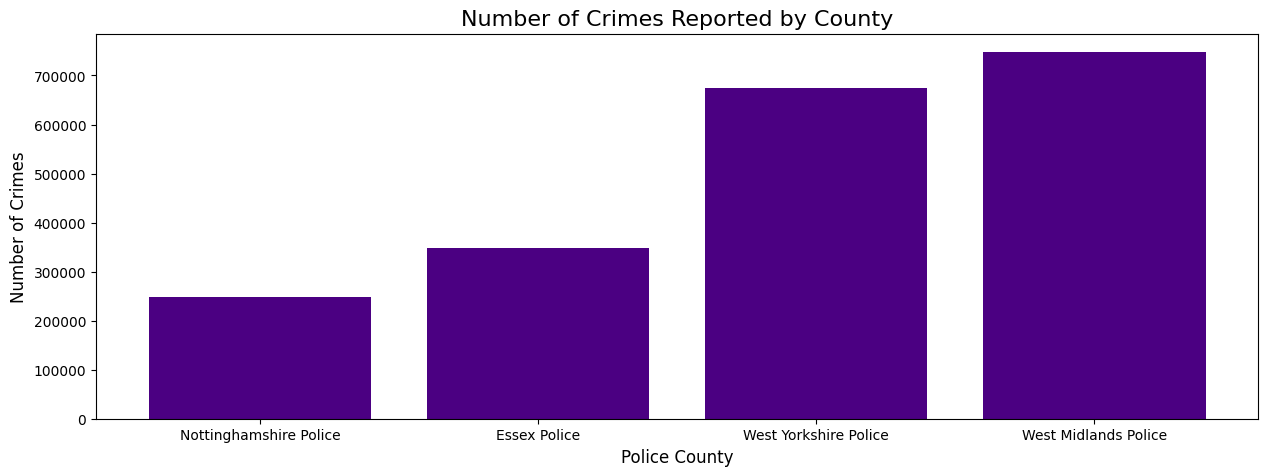

In [24]:
# spark dataframe to pandas
county_crime_count_pd = county_crime_count.toPandas()

plt.figure(figsize=(15, 5))
plt.bar(county_crime_count_pd['Reported_by'], county_crime_count_pd['crime_count'], color='indigo')
plt.title("Number of Crimes Reported by County", fontsize=16)
plt.xlabel("Police County", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.show()

In [25]:
# Create new data frame with Month and Counts per Month
PoliceDataSet2 = PoliceDataSet.select(PoliceDataSet.Month)\
.groupby(PoliceDataSet.Month).count()

PoliceDataSet2.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



In [26]:
PoliceDataSet2.orderBy(asc("Month")).show(25)

+-------+-----+
|  Month|count|
+-------+-----+
|2022-10|87408|
|2022-11|84279|
|2022-12|76655|
|2023-01|81228|
|2023-02|80791|
|2023-03|88297|
|2023-04|86425|
|2023-05|88696|
|2023-06|87542|
|2023-07|87041|
|2023-08|81233|
|2023-09|80263|
|2023-10|82249|
|2023-11|76615|
|2023-12|72186|
|2024-01|72773|
|2024-02|71131|
|2024-03|78886|
|2024-04|74817|
|2024-05|80890|
|2024-06|78237|
|2024-07|85904|
|2024-08|81948|
|2024-09|75228|
|2024-10|77568|
+-------+-----+



In [27]:
PoliceDataSet2.registerTempTable('tbl_monthlyCountCrimes')

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [28]:
# Create a new dataframe with total, average
monthlyCrimeAmount = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_monthlyCountCrimes group by substring(Month, 6, 2)")


In [29]:
monthlyCrimeAmountnew = monthlyCrimeAmount.orderBy('Month')
monthlyCrimeAmountnew.show(25)

+-----+------+-----------------+
|Month| Total|          Average|
+-----+------+-----------------+
|   01|154001|          77000.5|
|   02|151922|          75961.0|
|   03|167183|          83591.5|
|   04|161242|          80621.0|
|   05|169586|          84793.0|
|   06|165779|          82889.5|
|   07|172945|          86472.5|
|   08|163181|          81590.5|
|   09|155491|          77745.5|
|   10|247225|82408.33333333333|
|   11|160894|          80447.0|
|   12|148841|          74420.5|
+-----+------+-----------------+



In [30]:
# Register the monthlyCrimeAmount dataFrame as a temp table and show the contents
monthlyCrimeAmountnew.registerTempTable("monthlyCrimeAmount")
sqlContext.sql("select * from monthlyCrimeAmount").show()

+-----+------+-----------------+
|Month| Total|          Average|
+-----+------+-----------------+
|   01|154001|          77000.5|
|   02|151922|          75961.0|
|   03|167183|          83591.5|
|   04|161242|          80621.0|
|   05|169586|          84793.0|
|   06|165779|          82889.5|
|   07|172945|          86472.5|
|   08|163181|          81590.5|
|   09|155491|          77745.5|
|   10|247225|82408.33333333333|
|   11|160894|          80447.0|
|   12|148841|          74420.5|
+-----+------+-----------------+



In [31]:
# Prepare variables for visualisations
monthArray = sqlContext.sql("select Month from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()


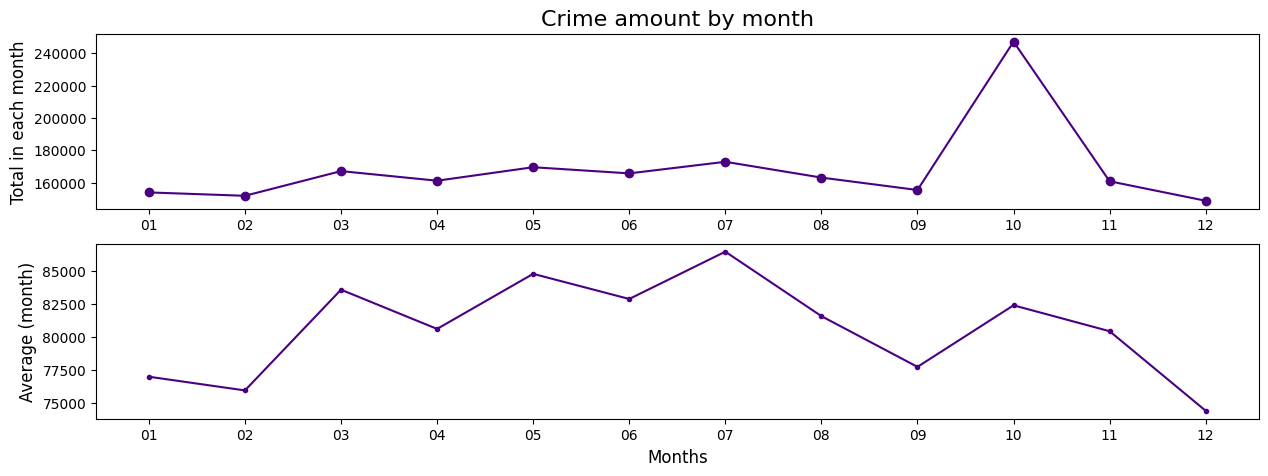

In [32]:
# Plot visualisations
y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-',color='indigo')
plt.title('Crime amount by month',fontsize=16)
plt.ylabel('Total in each month', fontsize=12)



plt.subplot(2, 1, 2)
plt.plot(y, a, '.-',color='indigo')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average (month)', fontsize=12)

plt.show()

In [33]:
#create a new dataframe for crime type and occurences
crimeCounties = sqlContext.sql('''
    SELECT 
        Crime_type, 
        COUNT(Crime_type) AS Crime_total, 
        YEAR(TO_DATE(month, 'yyyy-MM')) AS Year
    FROM tbl_cityCrimes
    WHERE YEAR(TO_DATE(month, 'yyyy-MM')) IN (2022, 2023, 2024)
    GROUP BY Crime_type, YEAR(TO_DATE(month, 'yyyy-MM'))
    ORDER BY Year, Crime_total DESC
''')

crimeCounties.show(15)

+--------------------+-----------+----+
|          Crime_type|Crime_total|Year|
+--------------------+-----------+----+
|Violence and sexu...|     100300|2022|
|        Public order|      22799|2022|
|Criminal damage a...|      19861|2022|
|       Vehicle crime|      19831|2022|
|Anti-social behav...|      18602|2022|
|         Other theft|      17984|2022|
|         Shoplifting|      13479|2022|
|            Burglary|      12338|2022|
|               Drugs|       6640|2022|
|         Other crime|       5143|2022|
|             Robbery|       3463|2022|
|Possession of wea...|       3207|2022|
|Theft from the pe...|       2785|2022|
|       Bicycle theft|       1910|2022|
|Violence and sexu...|     392830|2023|
+--------------------+-----------+----+
only showing top 15 rows



In [34]:
# spark dataframe to pandas
crimeCounties_pd = crimeCounties.toPandas()
crimeCounties_pd

,Crime_type,Crime_total,Year
0,Violence and sexual offences,100300,2022
1,Public order,22799,2022
2,Criminal damage and arson,19861,2022
3,Vehicle crime,19831,2022
4,Anti-social behaviour,18602,2022
5,Other theft,17984,2022
6,Shoplifting,13479,2022
7,Burglary,12338,2022
8,Drugs,6640,2022
9,Other crime,5143,2022


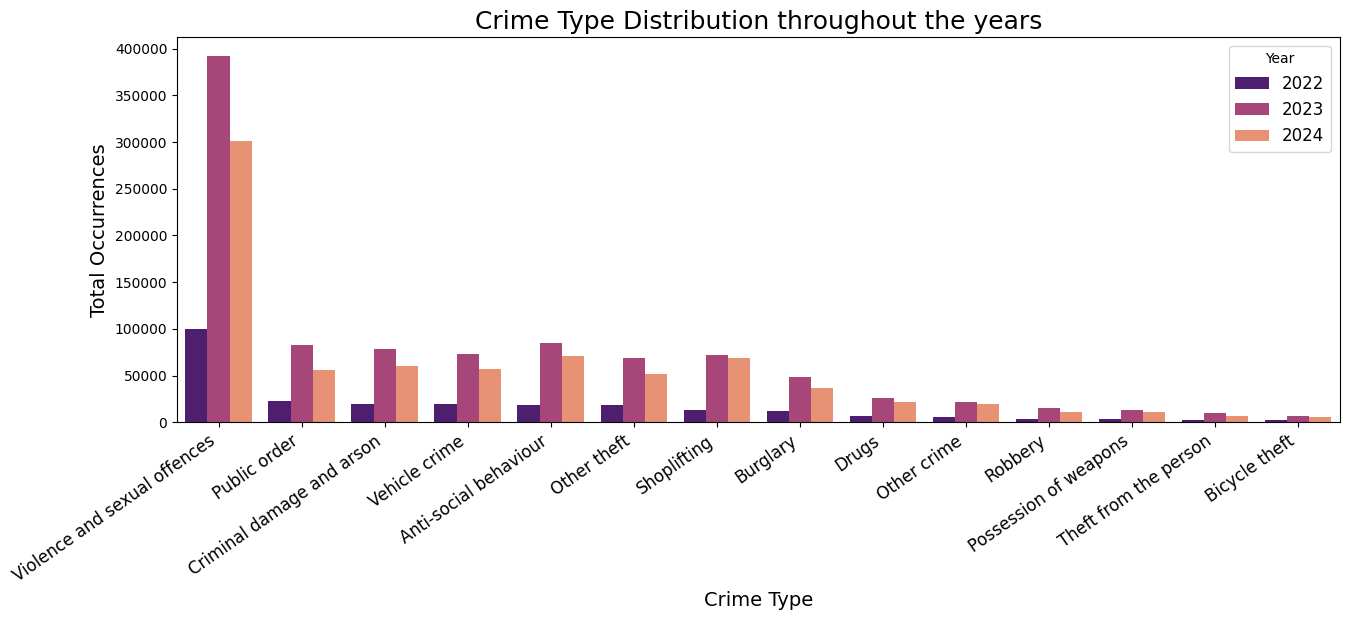

In [35]:
plt.figure(figsize=(15, 5)) 
sns.barplot(data=crimeCounties_pd,x='Crime_type',y='Crime_total',hue='Year',palette='magma')
plt.title('Crime Type Distribution throughout the years', fontsize=18)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Total Occurrences', fontsize=14)
plt.xticks(rotation=35, fontsize=12, ha='right')  
plt.legend(title='Year', loc='best',fontsize=12)
plt.show()

## West Midlands Police county analysis

### Longitude vs Latitude Analysis of West Midlands
For references I've used Seaborn official documentation alongside different sources to help with visualising and plotting my data points
links:             https://seaborn.pydata.org/generated/seaborn.histplot.html
Bivariate Kdeplot: https://www.digitalocean.com/community/tutorials/seaborn-kdeplot , https://seaborn.pydata.org/generated/seaborn.kdeplot.html


In [36]:
# Create a new dataframe for Longitude + Latitude for West Midlands crime without Null values
locationMidlands = sqlContext.sql('''
    SELECT Longitude, Latitude 
    FROM tbl_wMidlands
    WHERE Longitude IS NOT NULL AND Latitude IS NOT NULL
''')

# Display the first 15 rows
locationMidlands.show(15)

+---------+---------+
|Longitude| Latitude|
+---------+---------+
| -1.84979|52.590937|
|-1.851067|52.588979|
|-1.845479|52.591165|
|-1.847899|52.591564|
|-1.847899|52.591564|
|-1.840582|52.598279|
|-1.845233|52.593943|
|-1.840582|52.598279|
|-1.847197|52.598261|
|-1.848297|52.596015|
| -1.84988|52.599163|
|-1.854866|52.600599|
|-1.848297|52.596015|
|-1.847197|52.598261|
|-1.841059|52.605345|
+---------+---------+
only showing top 15 rows



In [37]:
# spark dataframe to pandas
locationMidlands_pd = locationMidlands.toPandas()
locationMidlands_pd


,Longitude,Latitude
0,-1.849790,52.590937
1,-1.851067,52.588979
2,-1.845479,52.591165
3,-1.847899,52.591564
4,-1.847899,52.591564
...,...,...
747790,-2.118325,52.573820
747791,-2.115445,52.572564
747792,-2.118325,52.573820
747793,-2.117890,52.570935


In [38]:
locationMidlands_pd.isnull().sum()

Longitude    0
Latitude     0
dtype: int64

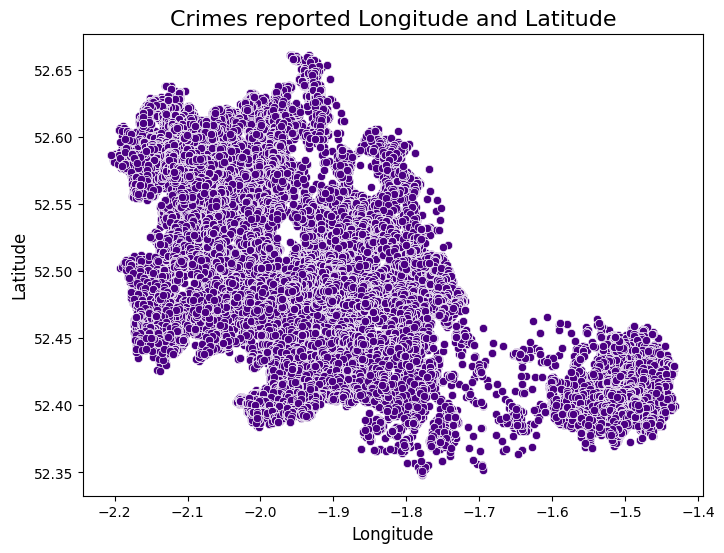

In [39]:
#Plotting scatter plot visualise a map of crimes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=locationMidlands_pd, color='indigo')
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

In [40]:
(747795*0.1)*2

149559.0

In [41]:
#make a new dataframe that contains 20% sample size of west midlands crime to ease the load of computation
locationMidlandsSample_pd = locationMidlands_pd.sample(n=149559, random_state=20)
locationMidlandsSample_pd


,Longitude,Latitude
447167,-1.882163,52.474564
302983,-2.089779,52.482670
546897,-1.925836,52.611425
24403,-2.066535,52.477750
580020,-1.830424,52.587126
...,...,...
684352,-2.044012,52.539818
558226,-1.819568,52.462807
552935,-1.834926,52.531845
517453,-1.821543,52.403736


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


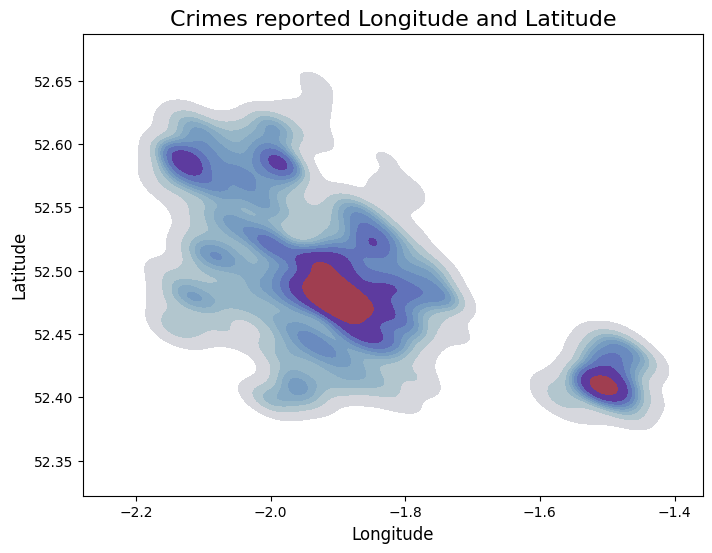

In [42]:
#Plotting Bivariate Kdeplot to show area of crimes
plt.figure(figsize=(8, 6))
sns.kdeplot(x = locationMidlandsSample_pd['Longitude'],y =locationMidlandsSample_pd['Latitude'],cmap='twilight',fill=True)
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


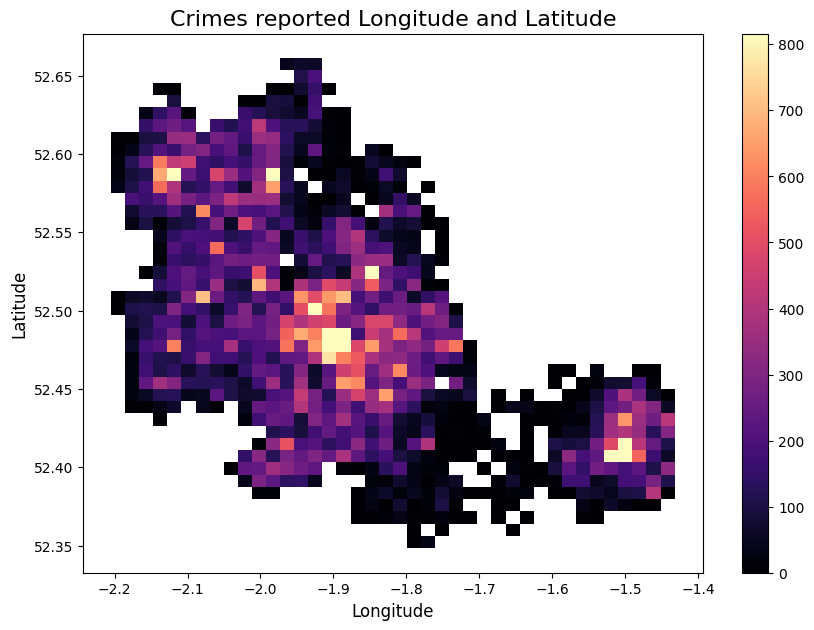

In [43]:
# Create the bivariate histogram to visualise the density 
plt.figure(figsize=(10, 7))
sns.histplot(x=locationMidlandsSample_pd['Longitude'], y=locationMidlandsSample_pd['Latitude'],bins=40,pmax=0.9,cbar=True,cmap='magma')
plt.title('Crimes reported Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [44]:
#create a new dataframe for crime type and occurences
crimeMidlands = sqlContext.sql('''
    SELECT Crime_type, COUNT(Crime_type) as Crime_total
    FROM tbl_wMidlands
    GROUP BY Crime_type
    ORDER BY Crime_total DESC
''')

crimeMidlands.show(15)

+--------------------+-----------+
|          Crime_type|Crime_total|
+--------------------+-----------+
|Violence and sexu...|     299775|
|       Vehicle crime|      72631|
|Criminal damage a...|      56235|
|         Shoplifting|      53234|
|Anti-social behav...|      52634|
|         Other theft|      50440|
|        Public order|      49782|
|            Burglary|      40445|
|             Robbery|      17240|
|               Drugs|      15978|
|Possession of wea...|      13919|
|         Other crime|      13371|
|Theft from the pe...|       7564|
|       Bicycle theft|       4547|
+--------------------+-----------+



In [45]:
# spark dataframe to pandas
crimeMidlands_pd = crimeMidlands.toPandas()
crimeMidlands_pd

,Crime_type,Crime_total
0,Violence and sexual offences,299775
1,Vehicle crime,72631
2,Criminal damage and arson,56235
3,Shoplifting,53234
4,Anti-social behaviour,52634
5,Other theft,50440
6,Public order,49782
7,Burglary,40445
8,Robbery,17240
9,Drugs,15978


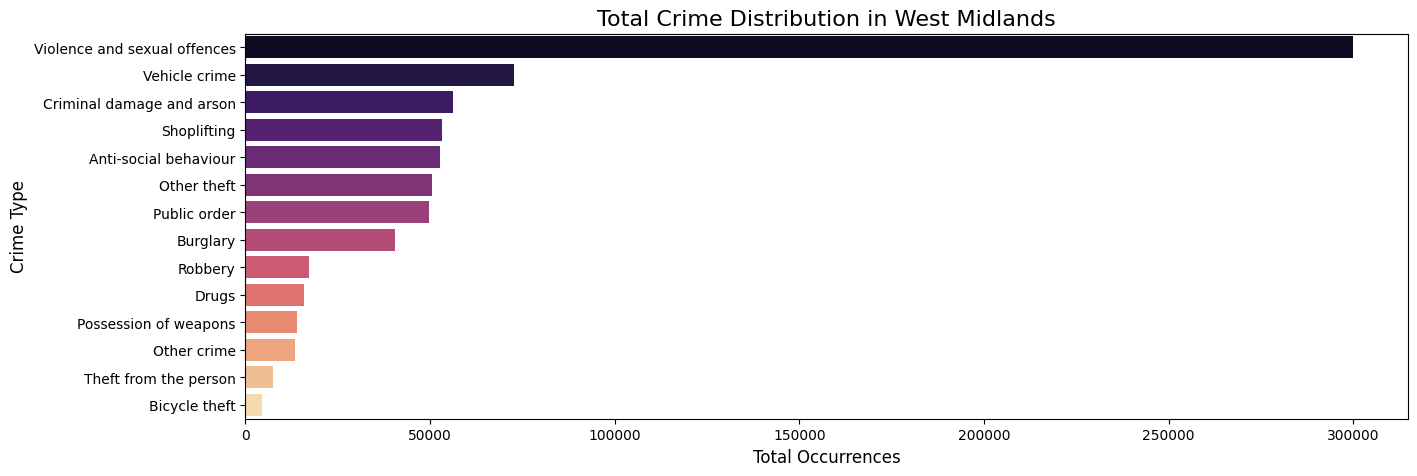

In [46]:
plt.figure(figsize=(15, 5)) 
sns.barplot(x='Crime_total', y='Crime_type', data=crimeMidlands_pd, palette='magma')
plt.title('Total Crime Distribution in West Midlands', fontsize=16)
plt.xlabel('Total Occurrences', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()

In [47]:
crimeMidlandsYearly = sqlContext.sql('''
    SELECT 
        Crime_type, 
        SUBSTRING(Month, 1, 4) AS Year, 
        COUNT(Crime_type) AS Crime_total
    FROM tbl_wMidlands
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Crime_type, SUBSTRING(Month, 1, 4)
    ORDER BY Year, Crime_total DESC
''')


In [48]:
crimeMidlandsYearly_pd = crimeMidlandsYearly.toPandas()
crimeMidlandsYearly_pd

,Crime_type,Year,Crime_total
0,Violence and sexual offences,2022,38610
1,Vehicle crime,2022,10077
2,Public order,2022,7563
3,Criminal damage and arson,2022,6961
4,Other theft,2022,6887
5,Burglary,2022,5667
6,Anti-social behaviour,2022,4413
7,Shoplifting,2022,4062
8,Robbery,2022,2056
9,Drugs,2022,1932


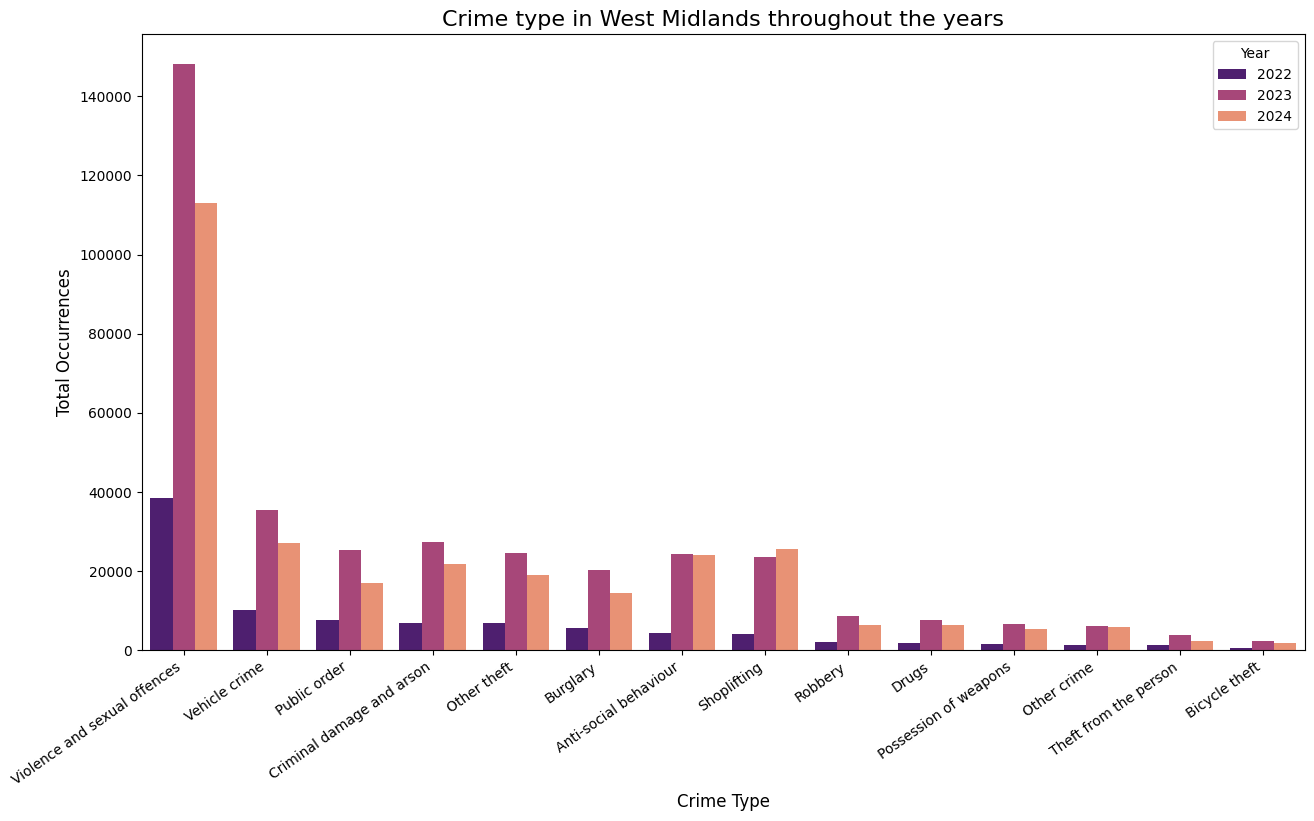

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(data=crimeMidlandsYearly_pd, x='Crime_type', y='Crime_total', hue='Year', palette='magma')
plt.title('Crime type in West Midlands throughout the years', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Occurrences', fontsize=12)
plt.xticks(rotation=35, ha='right')  
plt.legend(title='Year', fontsize=10)
plt.show()

In [50]:
#create a new dataframe for LSOA name and crime count for distinct regions in the west midlands
LSOACount = sqlContext.sql('''
    SELECT SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region,COUNT(Crime_type) AS Crime_count
    FROM tbl_wMidlands
    GROUP BY Region
    ORDER BY Crime_count DESC
''')

LSOACount.show(60)

+-----------------+-----------+
|           Region|Crime_count|
+-----------------+-----------+
|       Birmingham|     329389|
|         Coventry|      89254|
|         Sandwell|      83209|
|    Wolverhampton|      70545|
|          Walsall|      70048|
|           Dudley|      61703|
|         Solihull|      43000|
|            South|        161|
|       Bromsgrove|        157|
|         Nuneaton|        128|
|        Lichfield|         80|
|            North|         53|
|            Rugby|         50|
|          Warwick|         11|
|Stratford-on-Avon|          7|
+-----------------+-----------+



In [51]:
LSOACount_pd = LSOACount.toPandas()

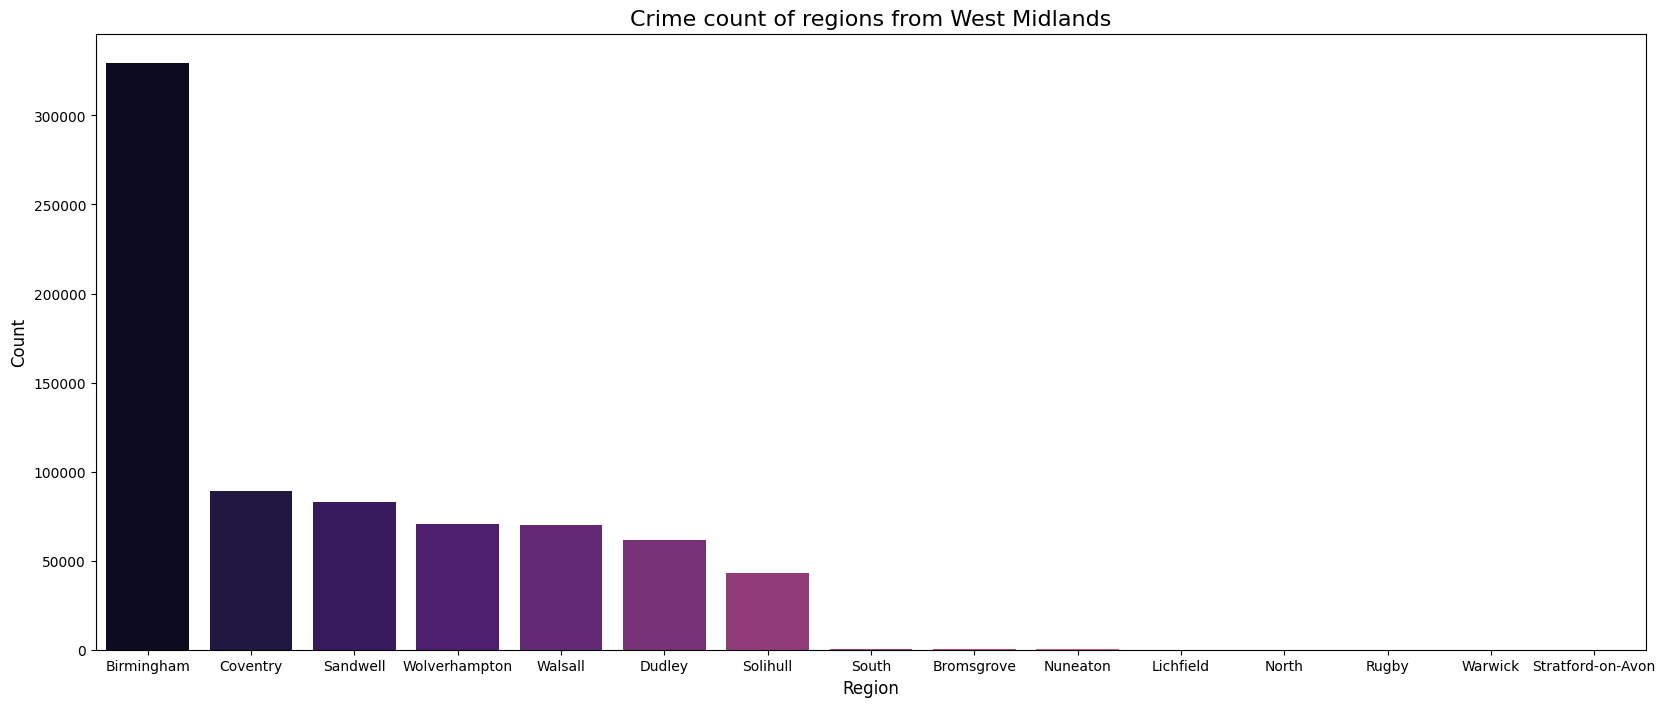

In [52]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x='Region', y='Crime_count', data=LSOACount_pd, palette='magma')
plt.title('Crime count of regions from West Midlands', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [53]:
# Dataframe to get crime count by region and year 
LSOACountYearly = sqlContext.sql('''
    SELECT 
        SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region,
        SUBSTRING(Month, 1, 4) AS Year,
        COUNT(Crime_type) AS Crime_count
    FROM tbl_wMidlands
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Region, SUBSTRING(Month, 1, 4)
    ORDER BY Region, Year
''')



In [54]:
# Convert the Spark DataFrame to Pandas
LSOACountYearly_pd = LSOACountYearly.toPandas()
LSOACountYearly_pd

,Region,Year,Crime_count
0,Birmingham,2022,41394
1,Birmingham,2023,160021
2,Birmingham,2024,127974
3,Bromsgrove,2022,18
4,Bromsgrove,2023,84
5,Bromsgrove,2024,55
6,Coventry,2022,11277
7,Coventry,2023,43594
8,Coventry,2024,34383
9,Dudley,2022,7406


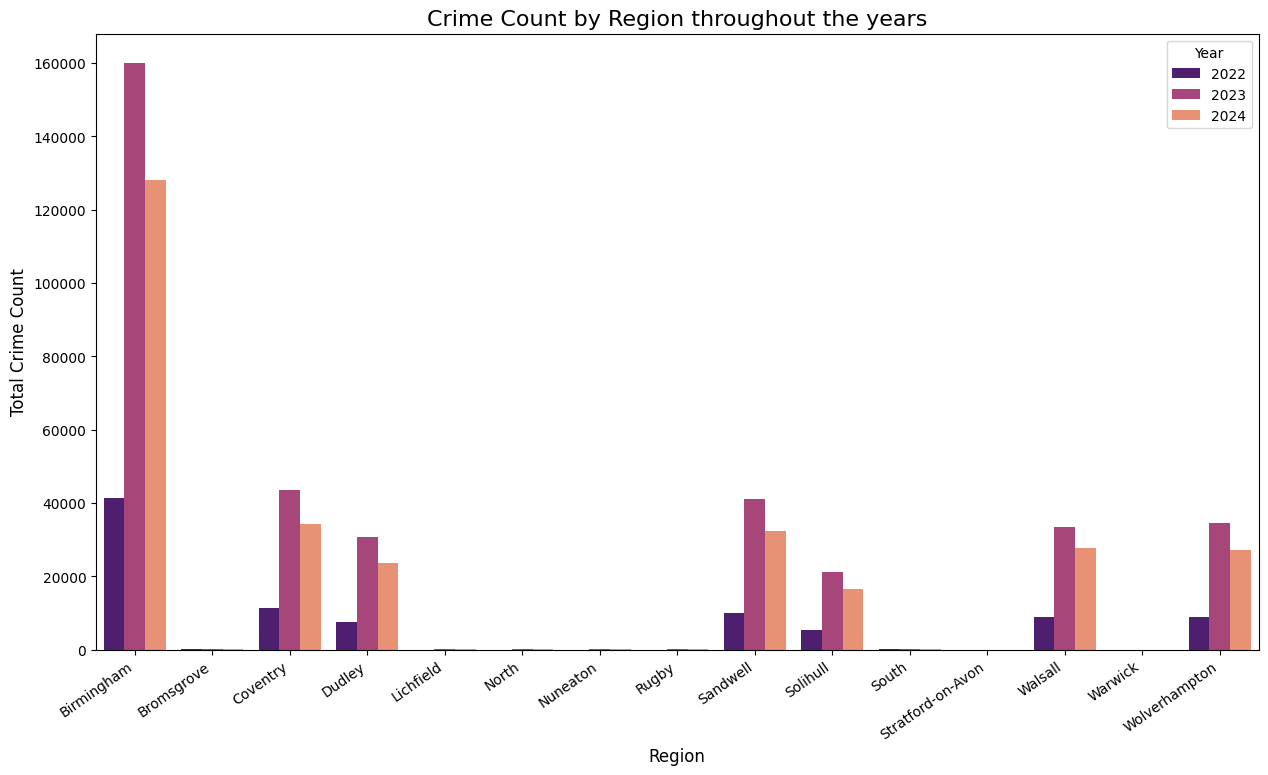

In [55]:
plt.figure(figsize=(15, 8))
sns.barplot(data=LSOACountYearly_pd, x='Region',y='Crime_count',hue='Year', palette='magma')
plt.title('Crime Count by Region throughout the years', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)
plt.xticks(rotation=35, ha='right') 
plt.show()

## West Yorkshire Police county analysis

In [56]:
# Create a new dataframe for Longitude + Latitude for West yorkshire crime without Null values
locationYorkshire = sqlContext.sql('''
    SELECT Longitude, Latitude 
    FROM tbl_wYorkshire
    WHERE Longitude IS NOT NULL AND Latitude IS NOT NULL
''')

# Display the first 15 rows
locationYorkshire.show(15)

+---------+---------+
|Longitude| Latitude|
+---------+---------+
|-1.472961|53.599861|
|-1.356632|53.589279|
|-1.882755|53.924927|
|-1.876427|53.943525|
|-1.875632|53.944325|
|-1.877105|53.946043|
|-1.883777| 53.94089|
| -1.88768|53.945253|
|-1.890862|53.946038|
| -1.89576|53.943418|
|-1.902213|53.946111|
|-1.902213|53.946111|
|-1.902213|53.946111|
|-1.892293|53.946695|
|-1.820308|53.924437|
+---------+---------+
only showing top 15 rows



In [57]:
# spark dataframe to pandas
locationYorkshire_pd = locationYorkshire.toPandas()
locationYorkshire_pd

,Longitude,Latitude
0,-1.472961,53.599861
1,-1.356632,53.589279
2,-1.882755,53.924927
3,-1.876427,53.943525
4,-1.875632,53.944325
...,...,...
665783,-1.327748,53.592042
665784,-1.328837,53.589145
665785,-1.330338,53.587859
665786,-1.326375,53.590048


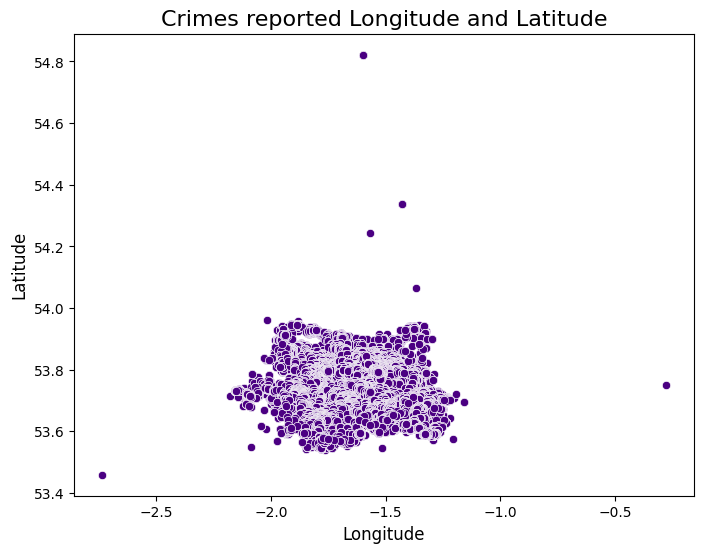

In [58]:
#Plotting scatter plot visualise a map of crimes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=locationYorkshire_pd, color='indigo')
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

In [59]:
(665788*0.1)*2

133157.6

In [60]:
#make a new dataframe that contains 20% sample size of west midlands crime to ease the load of computation
locationYorkshireSample_pd = locationYorkshire_pd.sample(n=133157, random_state=20)
locationYorkshireSample_pd


,Longitude,Latitude
316625,-1.705668,53.764828
342147,-1.757480,53.782075
335697,-1.500471,53.683714
351532,-1.686419,53.854191
297030,-1.682592,53.865812
...,...,...
261728,-1.774809,53.748332
109749,-1.570711,53.759405
440340,-1.561439,53.818082
579770,-1.831295,53.710495


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


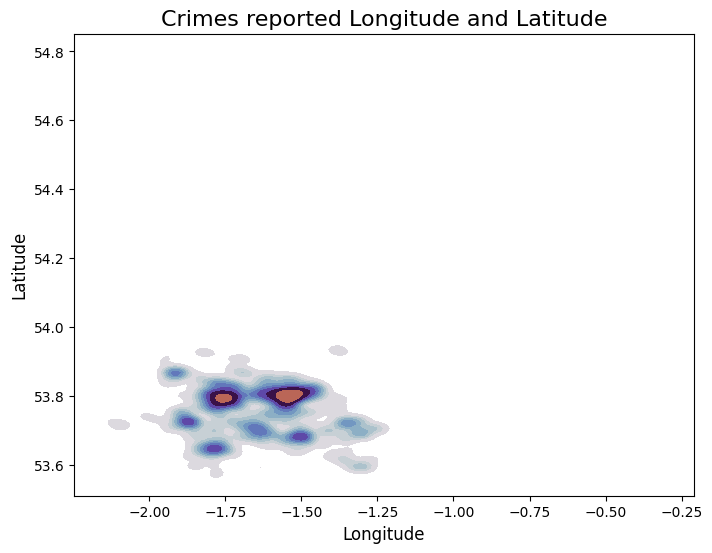

In [61]:
#Plotting Bivariate Kdeplot to show area of crimes
plt.figure(figsize=(8, 6))
sns.kdeplot(x = locationYorkshireSample_pd['Longitude'],y = locationYorkshireSample_pd['Latitude'],cmap='twilight',fill=True)
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


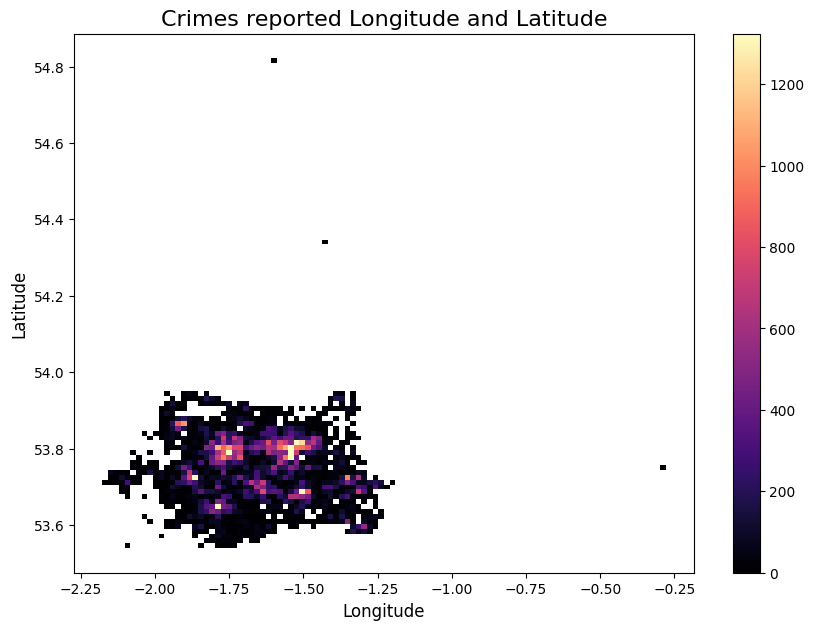

In [62]:
# Create the bivariate histogram to visualise the density 
plt.figure(figsize=(10, 7))
sns.histplot(x=locationYorkshireSample_pd['Longitude'], y=locationYorkshireSample_pd['Latitude'],bins=100,pmax=0.9,cbar=True,cmap='magma')
plt.title('Crimes reported Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [63]:
#create a new dataframe for crime type and occurences
crimeYorkshire = sqlContext.sql('''
    SELECT Crime_type, COUNT(Crime_type) as Crime_total
    FROM tbl_wYorkshire
    GROUP BY Crime_type
    ORDER BY Crime_total DESC
''')

crimeYorkshire.show(15)

+--------------------+-----------+
|          Crime_type|Crime_total|
+--------------------+-----------+
|Violence and sexu...|     276959|
|        Public order|      67872|
|Anti-social behav...|      56888|
|Criminal damage a...|      52676|
|         Shoplifting|      45640|
|         Other theft|      44778|
|       Vehicle crime|      36930|
|            Burglary|      32451|
|               Drugs|      19211|
|         Other crime|      18777|
|             Robbery|       6843|
|Theft from the pe...|       6594|
|Possession of wea...|       5491|
|       Bicycle theft|       4212|
+--------------------+-----------+



In [64]:
# spark dataframe to pandas
crimeYorkshire_pd = crimeYorkshire.toPandas()
crimeYorkshire_pd

,Crime_type,Crime_total
0,Violence and sexual offences,276959
1,Public order,67872
2,Anti-social behaviour,56888
3,Criminal damage and arson,52676
4,Shoplifting,45640
5,Other theft,44778
6,Vehicle crime,36930
7,Burglary,32451
8,Drugs,19211
9,Other crime,18777


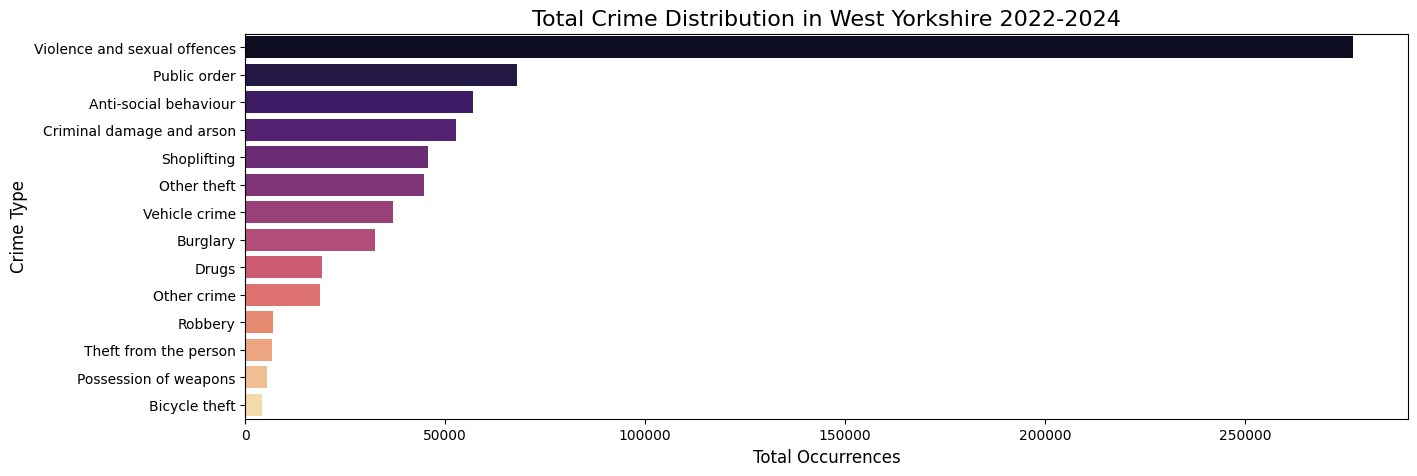

In [65]:
plt.figure(figsize=(15, 5)) 
sns.barplot(x='Crime_total', y='Crime_type', data=crimeYorkshire_pd, palette='magma')
plt.title('Total Crime Distribution in West Yorkshire 2022-2024', fontsize=16)
plt.xlabel('Total Occurrences', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()

In [66]:
crimeYorkshireYearly = sqlContext.sql('''
    SELECT 
        Crime_type, 
        SUBSTRING(Month, 1, 4) AS Year,  
        COUNT(Crime_type) AS Crime_total
    FROM tbl_wYorkshire
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Crime_type, SUBSTRING(Month, 1, 4)
    ORDER BY Year, Crime_total DESC
''')


In [67]:
crimeYorkshireYearly_pd = crimeYorkshireYearly.toPandas()
crimeYorkshireYearly_pd

,Crime_type,Year,Crime_total
0,Violence and sexual offences,2022,34365
1,Public order,2022,9353
2,Criminal damage and arson,2022,6766
3,Other theft,2022,5615
4,Anti-social behaviour,2022,5482
5,Vehicle crime,2022,4534
6,Shoplifting,2022,4268
7,Burglary,2022,3706
8,Drugs,2022,2342
9,Other crime,2022,2173


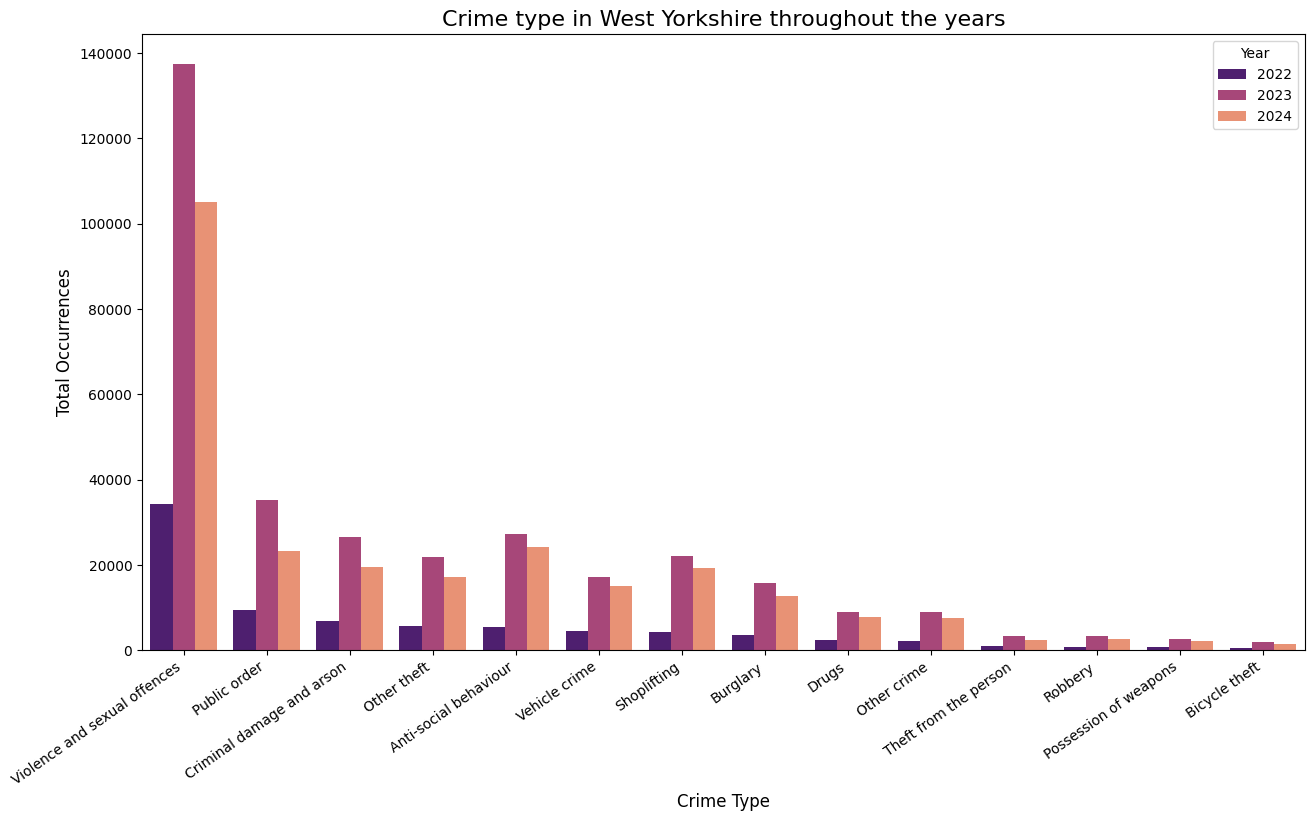

In [68]:
plt.figure(figsize=(15, 8))
sns.barplot(data=crimeYorkshireYearly_pd, x='Crime_type', y='Crime_total', hue='Year', palette='magma')
plt.title('Crime type in West Yorkshire throughout the years', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Occurrences', fontsize=12)
plt.xticks(rotation=35, ha='right')  
plt.legend(title='Year', fontsize=10)
plt.show()

In [69]:
#create a new dataframe for LSOA name and crime count for distinct regions in the west midlands
LSOACountYork = sqlContext.sql('''
    SELECT SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region,COUNT(Crime_type) AS Crime_count
    FROM tbl_wYorkshire
    GROUP BY Region
    ORDER BY Crime_count DESC
''')

LSOACountYork.show(60)



+----------+-----------+
|    Region|Crime_count|
+----------+-----------+
|     Leeds|     242193|
|  Bradford|     162241|
| Wakefield|     103142|
|  Kirklees|     102408|
|Calderdale|      55519|
|      null|       9534|
|     Selby|        127|
| Harrogate|         65|
|  Barnsley|         41|
|    County|         24|
|    Craven|         10|
| Hambleton|          4|
|    Oldham|          4|
|  Rochdale|          4|
| Doncaster|          3|
|Rossendale|          1|
|  Kingston|          1|
|       St.|          1|
+----------+-----------+



In [70]:
LSOACountYork_pd = LSOACountYork.toPandas()
LSOACountYork_pd

,Region,Crime_count
0,Leeds,242193
1,Bradford,162241
2,Wakefield,103142
3,Kirklees,102408
4,Calderdale,55519
5,None,9534
6,Selby,127
7,Harrogate,65
8,Barnsley,41
9,County,24


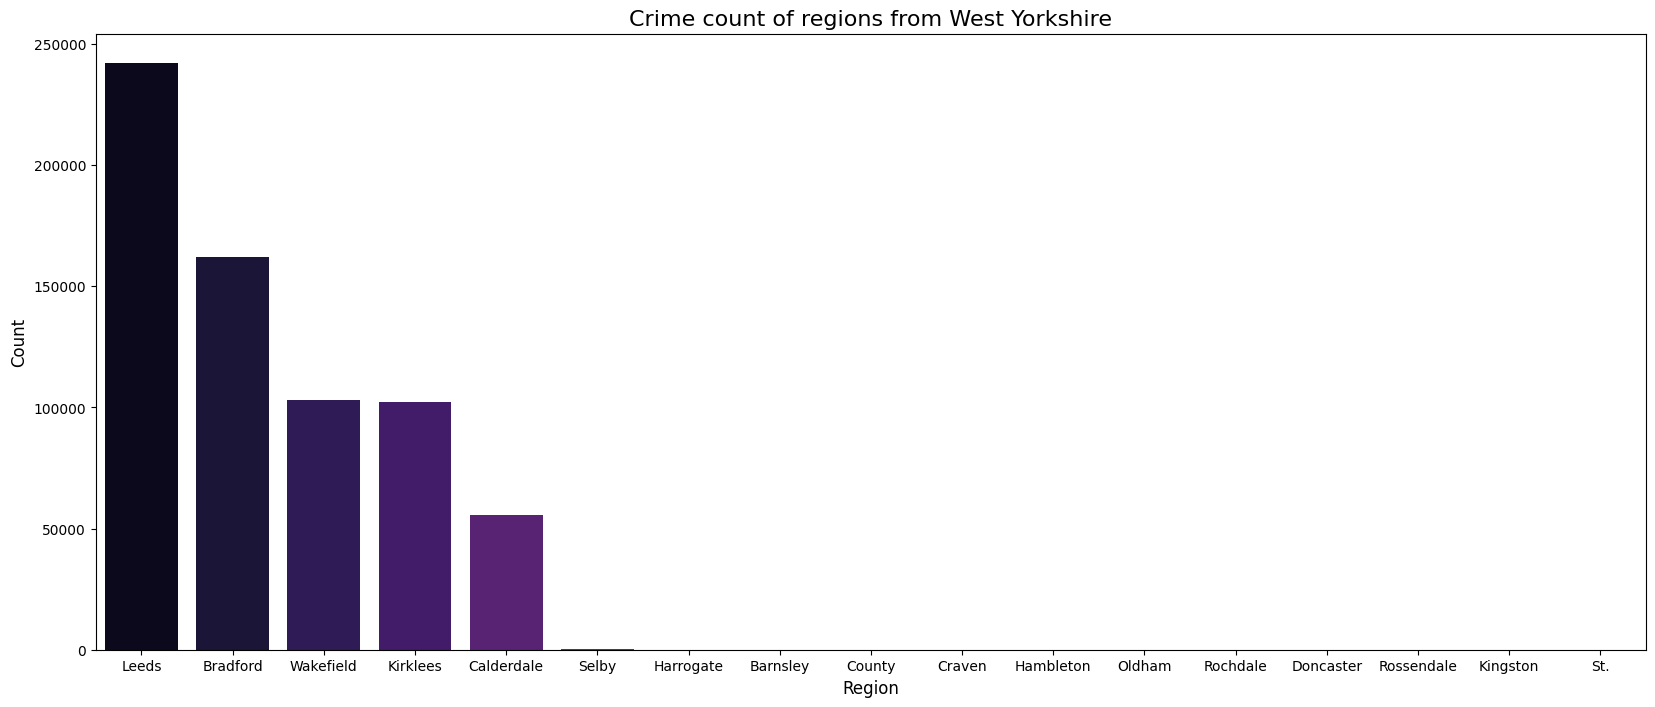

In [71]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x='Region', y='Crime_count', data=LSOACountYork_pd, palette='magma')
plt.title('Crime count of regions from West Yorkshire', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [72]:
LSOACountYorkYearly = sqlContext.sql('''
    SELECT 
        SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region,
        SUBSTRING(Month, 1, 4) AS Year,
        COUNT(Crime_type) AS Crime_count
    FROM tbl_wYorkshire
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Region, SUBSTRING(Month, 1, 4)
    ORDER BY Region, Year
''')

In [73]:
LSOACountYorkYearly_pd = LSOACountYorkYearly.toPandas()
LSOACountYorkYearly_pd

,Region,Year,Crime_count
0,None,2022,1545
1,None,2023,4841
2,None,2024,3148
3,Barnsley,2022,3
4,Barnsley,2023,20
5,Barnsley,2024,18
6,Bradford,2022,19529
7,Bradford,2023,79584
8,Bradford,2024,63128
9,Calderdale,2022,6549


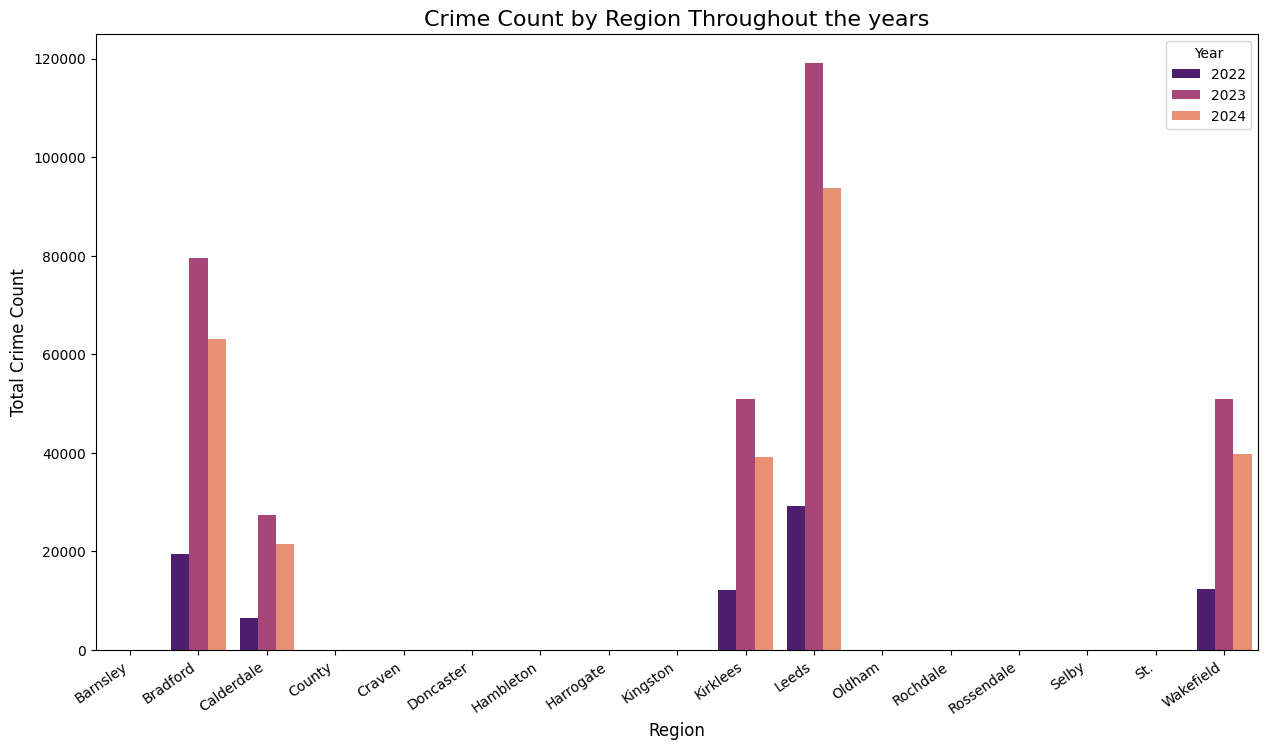

In [74]:
plt.figure(figsize=(15, 8))
sns.barplot(data=LSOACountYorkYearly_pd, x='Region',y='Crime_count',hue='Year', palette='magma')
plt.title('Crime Count by Region Throughout the years', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)
plt.xticks(rotation=35, ha='right') 
plt.show()

## Nottinghamshire Police county analysis

In [75]:
# Create a new dataframe for Longitude + Latitude for Nottinghamshire crime without Null values
locationNotts = sqlContext.sql('''
    SELECT Longitude, Latitude 
    FROM tbl_nottinghamshire
    WHERE Longitude IS NOT NULL AND Latitude IS NOT NULL
''')

# Display the first 15 rows
locationNotts.show(15)

+---------+---------+
|Longitude| Latitude|
+---------+---------+
|-1.347639|53.061766|
|-1.329102|53.024519|
|-1.338044|53.027688|
| -1.31172|53.003771|
|-1.252552|53.142999|
|-1.269785|53.143286|
|-1.252687|53.139521|
|-1.253503|53.142466|
|-1.251843|53.139948|
|-1.252687|53.139521|
|-1.264416|53.142498|
|-1.269785|53.143286|
|-1.264416|53.142498|
|-1.259196|  53.1418|
|-1.253696|53.141676|
+---------+---------+
only showing top 15 rows



In [76]:
# spark dataframe to pandas
locationNotts_pd = locationNotts.toPandas()
locationNotts_pd

,Longitude,Latitude
0,-1.347639,53.061766
1,-1.329102,53.024519
2,-1.338044,53.027688
3,-1.311720,53.003771
4,-1.252552,53.142999
...,...,...
245268,0.664551,51.553047
245269,-1.318008,54.610922
245270,-2.234476,51.750453
245271,-1.831630,51.578269


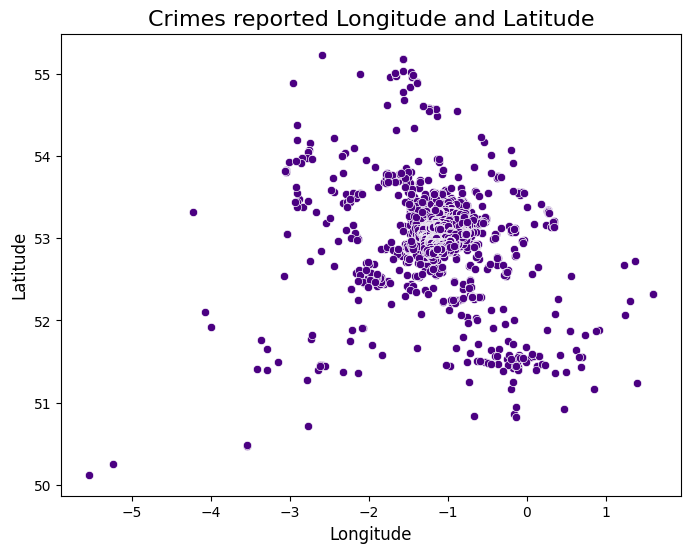

In [77]:
#Plotting scatter plot visualise a map of crimes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=locationNotts_pd, color='indigo')
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

In [78]:

245273*0.5

122636.5

In [79]:
#make a new dataframe that contains 20% sample size of west midlands crime to ease the load of computation
locationNottsSample_pd = locationNotts_pd.sample(n=122636, random_state=20)
locationNottsSample_pd


,Longitude,Latitude
88002,-1.190553,53.009274
41641,-1.164775,53.140124
238427,-1.315628,53.048749
66510,-1.183047,52.987648
79888,-1.177104,52.956234
...,...,...
234707,-1.155058,52.984531
117122,-1.106828,52.964932
34004,-1.238779,52.957759
221622,-1.029764,52.911011


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


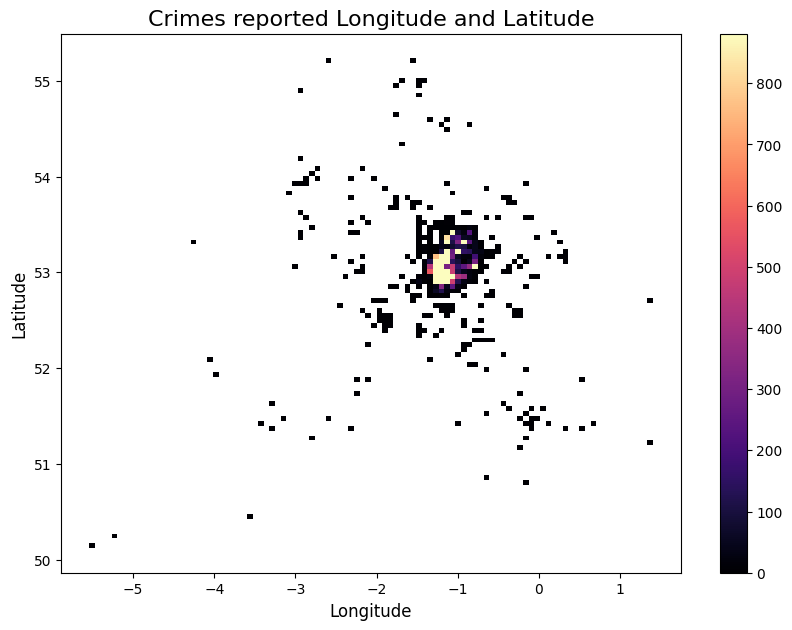

In [80]:
# Create the bivariate histogram to visualise the density 
plt.figure(figsize=(10, 7))
sns.histplot(x=locationNottsSample_pd['Longitude'], y=locationNottsSample_pd['Latitude'],bins=100,pmax=0.1,cbar=True,cmap='magma')
plt.title('Crimes reported Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [81]:
#create a new dataframe for crime type and occurences
crimeNotts = sqlContext.sql('''
    SELECT Crime_type, COUNT(Crime_type) as Crime_total
    FROM tbl_nottinghamshire
    GROUP BY Crime_type
    ORDER BY Crime_total DESC
''')

crimeNotts.show(15)

+--------------------+-----------+
|          Crime_type|Crime_total|
+--------------------+-----------+
|Violence and sexu...|      80136|
|Anti-social behav...|      34015|
|         Shoplifting|      30936|
|Criminal damage a...|      22235|
|         Other theft|      17516|
|        Public order|      17069|
|       Vehicle crime|      11511|
|            Burglary|       9306|
|               Drugs|       8268|
|         Other crime|       6202|
|Possession of wea...|       3374|
|       Bicycle theft|       2604|
|             Robbery|       2267|
|Theft from the pe...|       2031|
+--------------------+-----------+



In [82]:
# spark dataframe to pandas
crimeNotts_pd = crimeNotts.toPandas()
crimeNotts_pd

,Crime_type,Crime_total
0,Violence and sexual offences,80136
1,Anti-social behaviour,34015
2,Shoplifting,30936
3,Criminal damage and arson,22235
4,Other theft,17516
5,Public order,17069
6,Vehicle crime,11511
7,Burglary,9306
8,Drugs,8268
9,Other crime,6202


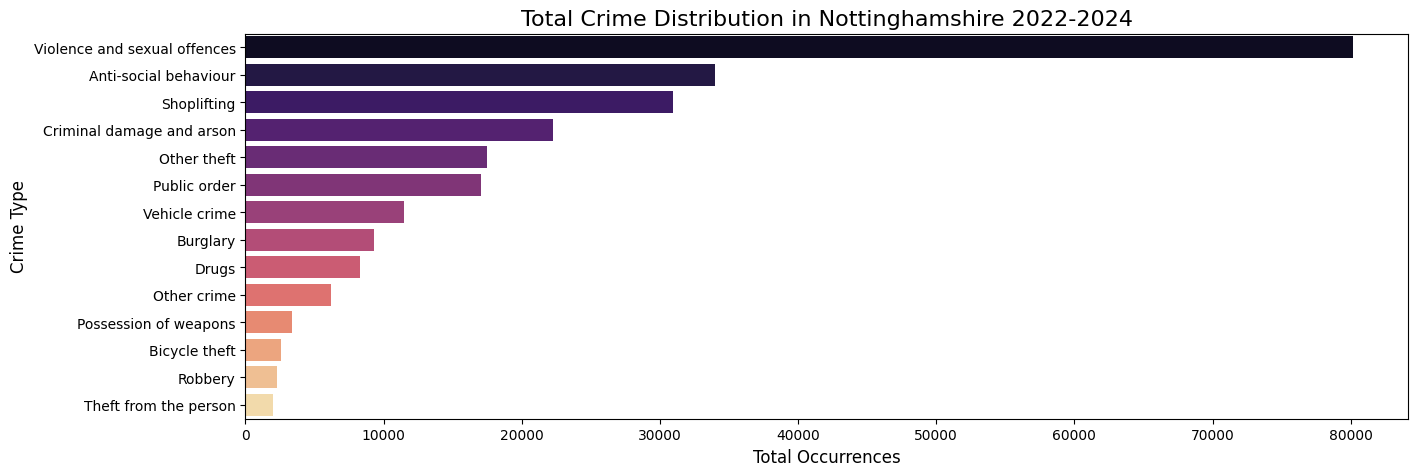

In [83]:
plt.figure(figsize=(15, 5)) 
sns.barplot(x='Crime_total', y='Crime_type', data=crimeNotts_pd, palette='magma')
plt.title('Total Crime Distribution in Nottinghamshire 2022-2024', fontsize=16)
plt.xlabel('Total Occurrences', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()

In [84]:
crimeNottsYearly = sqlContext.sql('''
    SELECT 
        Crime_type, 
        SUBSTRING(Month, 1, 4) AS Year,  
        COUNT(Crime_type) AS Crime_total
    FROM tbl_nottinghamshire
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Crime_type, SUBSTRING(Month, 1, 4)
    ORDER BY Year, Crime_total DESC
''')


In [85]:
crimeNottsYearly_pd = crimeNottsYearly.toPandas()
crimeNottsYearly_pd

,Crime_type,Year,Crime_total
0,Violence and sexual offences,2022,9686
1,Anti-social behaviour,2022,4323
2,Shoplifting,2022,2878
3,Criminal damage and arson,2022,2759
4,Public order,2022,2189
5,Other theft,2022,2161
6,Vehicle crime,2022,1613
7,Burglary,2022,1330
8,Drugs,2022,1002
9,Other crime,2022,706


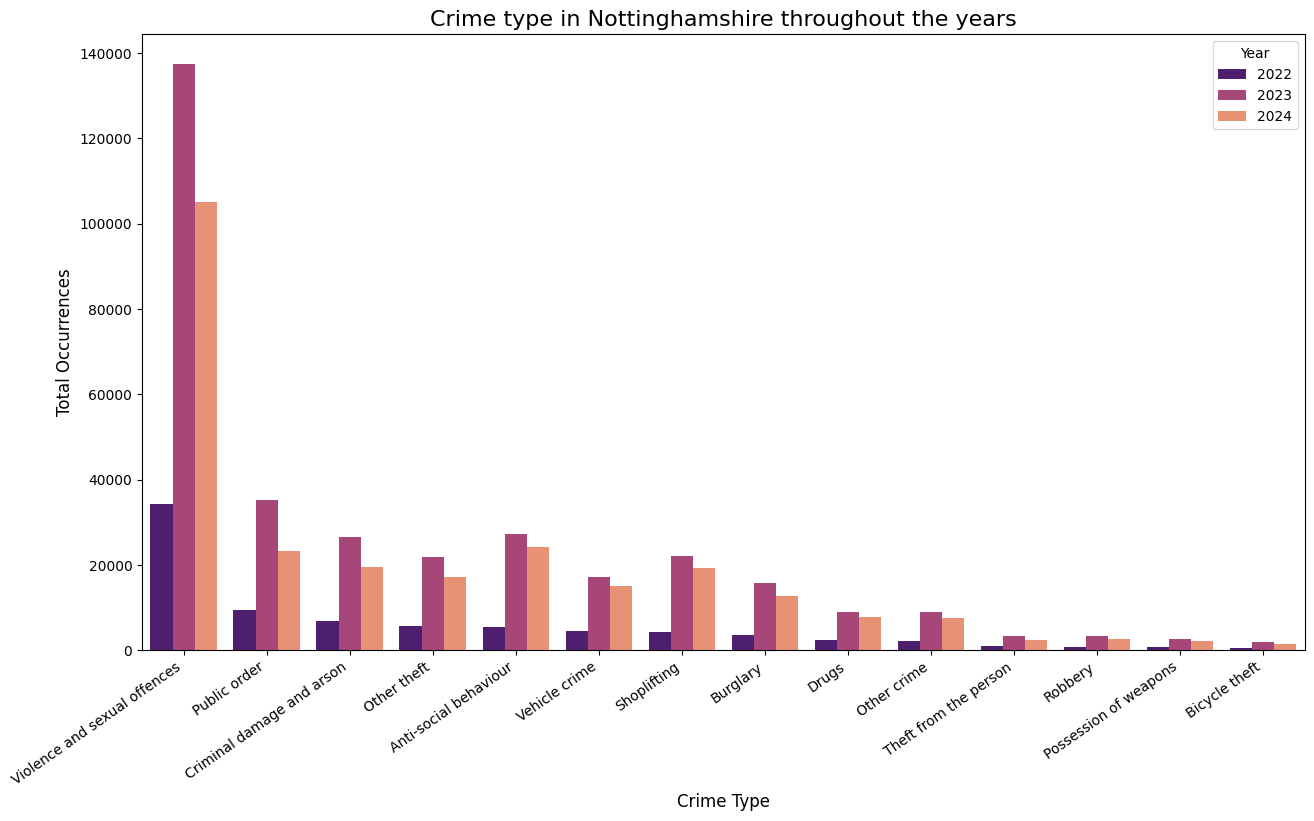

In [86]:
plt.figure(figsize=(15, 8))
sns.barplot(data=crimeYorkshireYearly_pd, x='Crime_type', y='Crime_total', hue='Year', palette='magma')
plt.title('Crime type in Nottinghamshire throughout the years', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Occurrences', fontsize=12)
plt.xticks(rotation=35, ha='right')  
plt.legend(title='Year', fontsize=10)
plt.show()

In [87]:
#create a new dataframe for LSOA name and crime count for distinct regions in the west midlands
LSOACountNotts = sqlContext.sql('''
    SELECT SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region, COUNT(Crime_type) AS Crime_count
    FROM tbl_nottinghamshire
    WHERE LSOA_name IS NOT NULL AND LSOA_name != ''  
    GROUP BY Region
    ORDER BY Crime_count DESC
     
''')

# Show the results
LSOACountNotts.show(60)


+---------------+-----------+
|         Region|Crime_count|
+---------------+-----------+
|     Nottingham|      99448|
|      Mansfield|      28017|
|       Ashfield|      26070|
|      Bassetlaw|      23947|
|         Newark|      21231|
|       Broxtowe|      17261|
|        Gedling|      15281|
|     Rushcliffe|      12382|
|       Bolsover|        211|
|        Erewash|        204|
|          North|        150|
|          Amber|        116|
|          Derby|         96|
|      Doncaster|         82|
|          South|         60|
|           East|         58|
|           West|         48|
|      Rotherham|         45|
|      Charnwood|         34|
|      Leicester|         32|
|        Lincoln|         30|
|   Chesterfield|         28|
|      Sheffield|         26|
|     Birmingham|         20|
|         Melton|         15|
|       Barnsley|         11|
|          Leeds|         11|
|          Blaby|         10|
|       Hinckley|          9|
|      Lancaster|          8|
|   Peterb

In [88]:
#create a new dataframe for LSOA and excluding other areas of police counties
LSOACountNottsLimit = sqlContext.sql('''
    SELECT SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region, COUNT(Crime_type) AS Crime_count
    FROM tbl_nottinghamshire
    WHERE LSOA_name IS NOT NULL AND LSOA_name != ''  
    GROUP BY Region
    ORDER BY Crime_count DESC
    LIMIT 8
''')

# Show the results
LSOACountNottsLimit.show(60)

+----------+-----------+
|    Region|Crime_count|
+----------+-----------+
|Nottingham|      99448|
| Mansfield|      28017|
|  Ashfield|      26070|
| Bassetlaw|      23947|
|    Newark|      21231|
|  Broxtowe|      17261|
|   Gedling|      15281|
|Rushcliffe|      12382|
+----------+-----------+



In [89]:
LSOACountNottsLimit_pd = LSOACountNottsLimit.toPandas()
LSOACountNottsLimit_pd

,Region,Crime_count
0,Nottingham,99448
1,Mansfield,28017
2,Ashfield,26070
3,Bassetlaw,23947
4,Newark,21231
5,Broxtowe,17261
6,Gedling,15281
7,Rushcliffe,12382


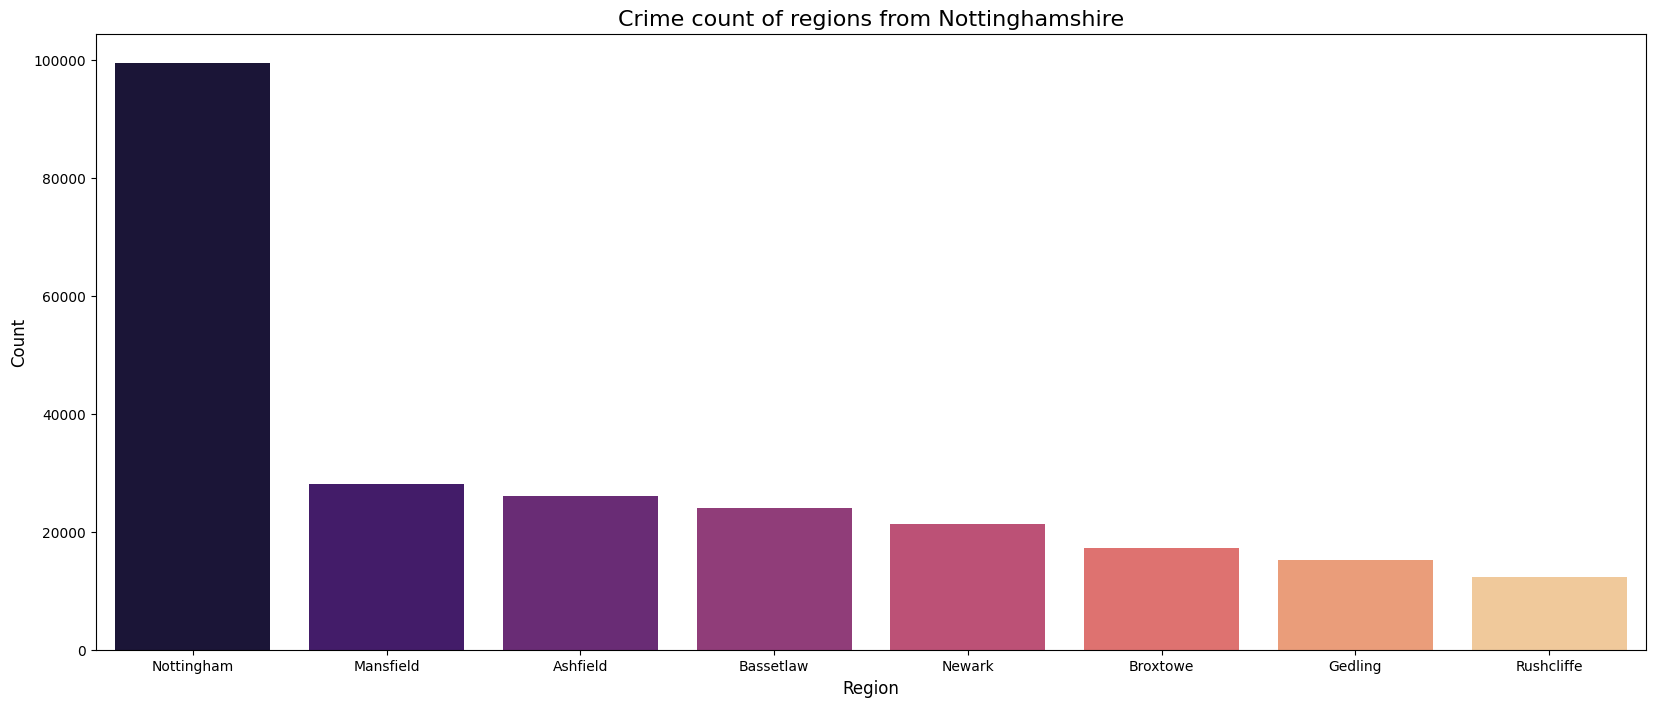

In [90]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x='Region', y='Crime_count', data=LSOACountNottsLimit_pd, palette='magma')
plt.title('Crime count of regions from Nottinghamshire', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [91]:
LSOACountNottsLimit.createOrReplaceTempView('tbl_LSOACountNottsLimit')

In [92]:
# Query for the top 8 regions with a breakdown by year
LSOACountNottsLimitYearly = sqlContext.sql('''
    SELECT 
        SUBSTRING_INDEX(LSOA_name, ' ', 1) AS Region, 
        YEAR(TO_DATE(month, 'yyyy-MM')) AS Year, 
        COUNT(Crime_type) AS Crime_count
    FROM tbl_nottinghamshire
    WHERE YEAR(TO_DATE(month, 'yyyy-MM')) IN (2022, 2023, 2024)  
    GROUP BY Region, YEAR(TO_DATE(month, 'yyyy-MM'))
    ORDER BY Crime_count DESC, Region, Year
    LIMIT 24
''')

# Show the results
LSOACountNottsLimitYearly.show(24)

+----------+----+-----------+
|    Region|Year|Crime_count|
+----------+----+-----------+
|Nottingham|2023|      49626|
|Nottingham|2024|      37682|
| Mansfield|2023|      14510|
|  Ashfield|2023|      13313|
|Nottingham|2022|      12140|
| Bassetlaw|2023|      11904|
|    Newark|2023|      10441|
| Mansfield|2024|      10209|
|  Ashfield|2024|       9666|
| Bassetlaw|2024|       9065|
|  Broxtowe|2023|       8546|
|    Newark|2024|       8314|
|   Gedling|2023|       7763|
|  Broxtowe|2024|       6646|
|Rushcliffe|2023|       6076|
|   Gedling|2024|       5687|
|Rushcliffe|2024|       4819|
| Mansfield|2022|       3298|
|  Ashfield|2022|       3091|
| Bassetlaw|2022|       2978|
|    Newark|2022|       2476|
|  Broxtowe|2022|       2069|
|   Gedling|2022|       1831|
|Rushcliffe|2022|       1487|
+----------+----+-----------+



In [93]:
LSOACountNottsLimitYearly_pd = LSOACountNottsLimitYearly.toPandas()
LSOACountNottsLimitYearly_pd

,Region,Year,Crime_count
0,Nottingham,2023,49626
1,Nottingham,2024,37682
2,Mansfield,2023,14510
3,Ashfield,2023,13313
4,Nottingham,2022,12140
5,Bassetlaw,2023,11904
6,Newark,2023,10441
7,Mansfield,2024,10209
8,Ashfield,2024,9666
9,Bassetlaw,2024,9065


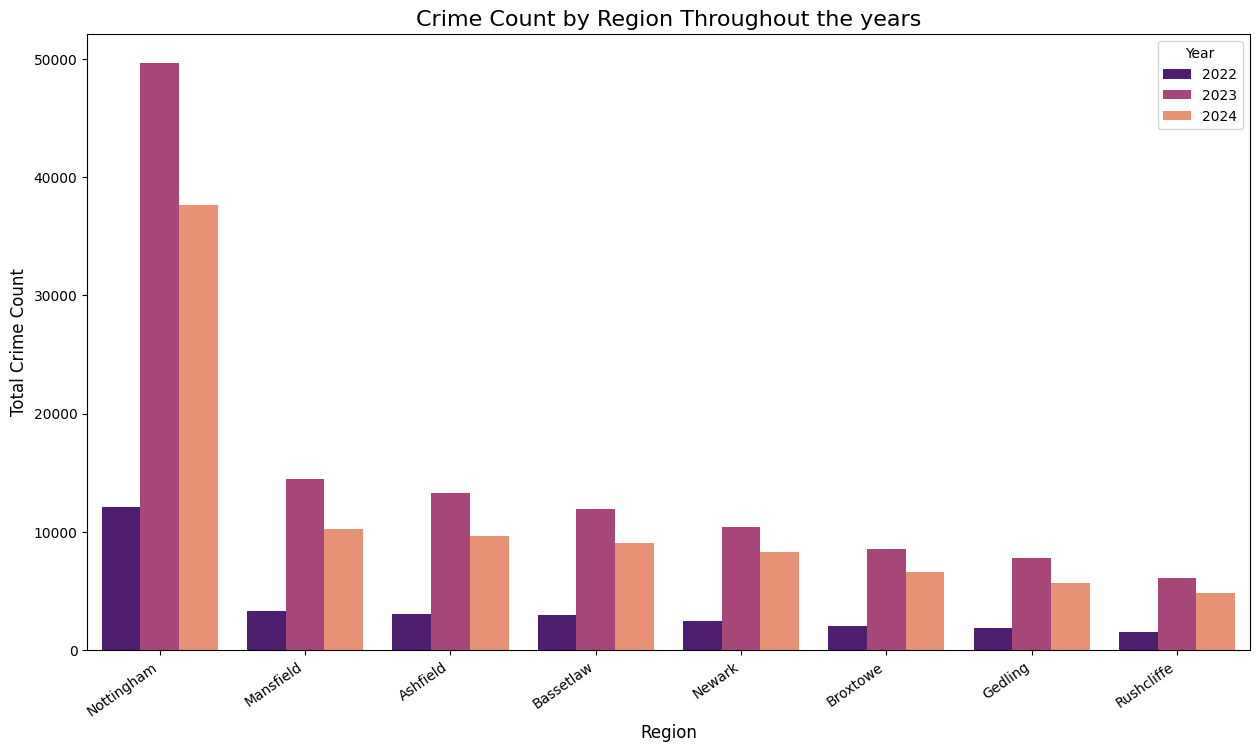

In [94]:
plt.figure(figsize=(15, 8))
sns.barplot(data=LSOACountNottsLimitYearly_pd, x='Region',y='Crime_count',hue='Year', palette='magma')
plt.title('Crime Count by Region Throughout the years', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)
plt.xticks(rotation=35, ha='right') 
plt.show()

## Essex Police county analysis

In [95]:
# Create a new dataframe for Longitude + Latitude for Essex crime without Null values
locationEssex = sqlContext.sql('''
    SELECT Longitude, Latitude 
    FROM tbl_essex
    WHERE Longitude IS NOT NULL AND Latitude IS NOT NULL
''')

# Display the first 15 rows
locationEssex.show(15)

+---------+---------+
|Longitude| Latitude|
+---------+---------+
| 0.971553|51.963597|
| 0.439211| 51.64271|
|  0.43656|51.638817|
| 0.433952|51.643008|
| 0.433923|51.644628|
| 0.433729|51.641007|
| 0.422862|51.642671|
| 0.422862|51.642671|
|  0.42802|51.638311|
|  0.42802|51.638311|
| 0.421325|51.637981|
|  0.42802|51.638311|
|  0.42802|51.638311|
| 0.408446|51.640674|
| 0.408446|51.640674|
+---------+---------+
only showing top 15 rows



In [96]:
# spark dataframe to pandas
locationEssex_pd = locationEssex.toPandas()
locationEssex_pd

,Longitude,Latitude
0,0.971553,51.963597
1,0.439211,51.642710
2,0.436560,51.638817
3,0.433952,51.643008
4,0.433923,51.644628
...,...,...
342886,0.325805,51.829149
342887,0.316243,51.804320
342888,0.322175,51.779743
342889,0.329067,51.835559


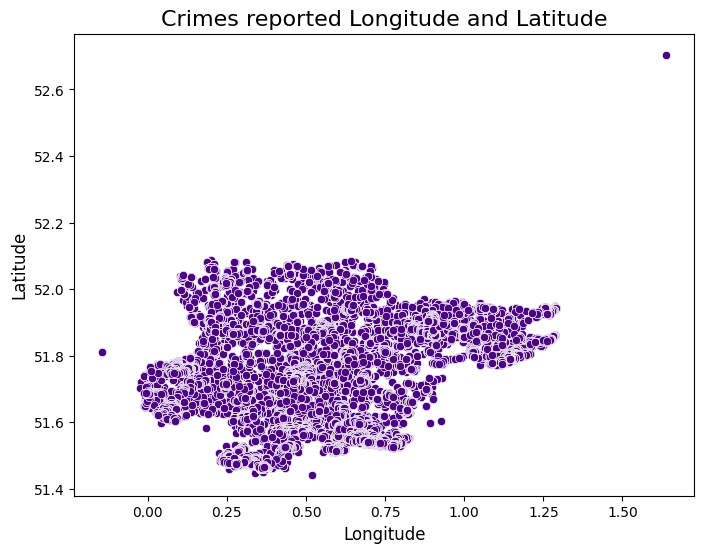

In [97]:
#Plotting scatter plot visualise a map of crimes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=locationEssex_pd, color='indigo')
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

In [98]:
342891*0.5

171445.5

In [99]:
 #make a new dataframe that contains 20% sample size of west midlands crime to ease the load of computation
locationEssexSample_pd = locationEssex_pd.sample(n=171445, random_state=20)
locationEssexSample_pd


,Longitude,Latitude
306353,0.457283,51.571638
308992,0.470491,51.749505
128663,0.712856,51.537864
195273,0.084762,51.607823
120013,0.545351,51.885879
...,...,...
80462,0.920276,51.884073
167046,0.900410,51.900565
244148,0.289069,51.589753
238647,1.247883,51.925443


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


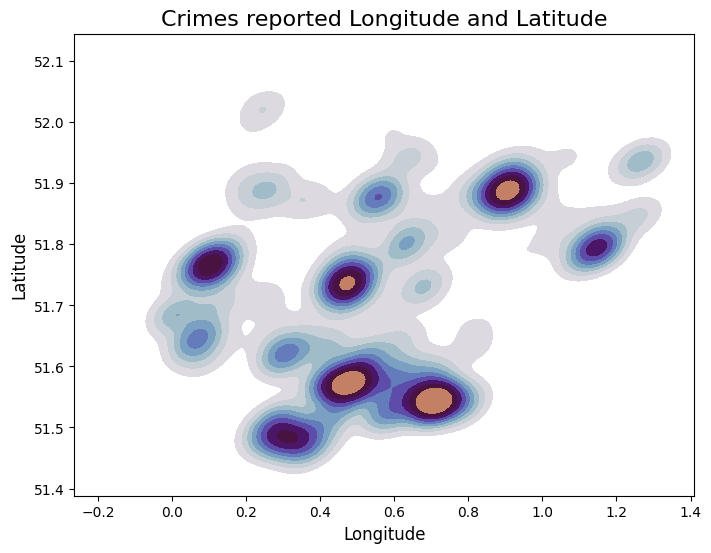

In [100]:
#Plotting Bivariate Kdeplot to show area of crimes
plt.figure(figsize=(8, 6))
sns.kdeplot(x = locationEssexSample_pd['Longitude'],y = locationEssexSample_pd['Latitude'],cmap='twilight',fill=True)
plt.title('Crimes reported Longitude and Latitude',fontsize='16')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude' ,fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


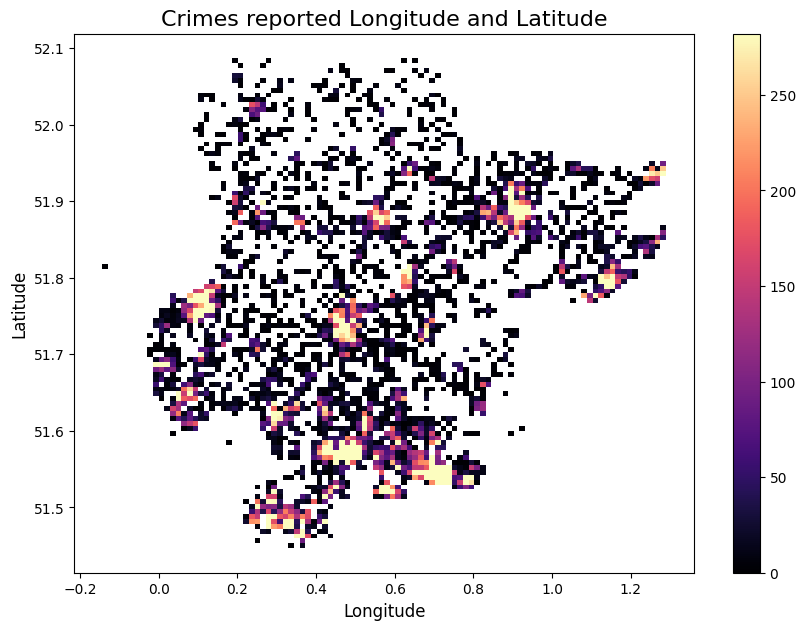

In [101]:
# Create the bivariate histogram to visualise the density 
plt.figure(figsize=(10, 7))
sns.histplot(x=locationEssexSample_pd['Longitude'], y=locationEssexSample_pd['Latitude'],bins=100,pmax=0.5,cbar=True,cmap='magma')
plt.title('Crimes reported Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [102]:
#create a new dataframe for crime type and occurences
crimeEssex = sqlContext.sql('''
    SELECT Crime_type, COUNT(Crime_type) as Crime_total
    FROM tbl_essex
    GROUP BY Crime_type
    ORDER BY Crime_total DESC
''')

crimeEssex.show(15)

+--------------------+-----------+
|          Crime_type|Crime_total|
+--------------------+-----------+
|Violence and sexu...|     137729|
|Anti-social behav...|      31728|
|       Vehicle crime|      28736|
|Criminal damage a...|      27700|
|        Public order|      26888|
|         Other theft|      25785|
|         Shoplifting|      24359|
|            Burglary|      14425|
|               Drugs|      11103|
|         Other crime|       7229|
|Possession of wea...|       3630|
|             Robbery|       3074|
|       Bicycle theft|       2897|
|Theft from the pe...|       2420|
+--------------------+-----------+



In [103]:
crimeEssex_pd = crimeEssex.toPandas()
crimeEssex_pd 

,Crime_type,Crime_total
0,Violence and sexual offences,137729
1,Anti-social behaviour,31728
2,Vehicle crime,28736
3,Criminal damage and arson,27700
4,Public order,26888
5,Other theft,25785
6,Shoplifting,24359
7,Burglary,14425
8,Drugs,11103
9,Other crime,7229


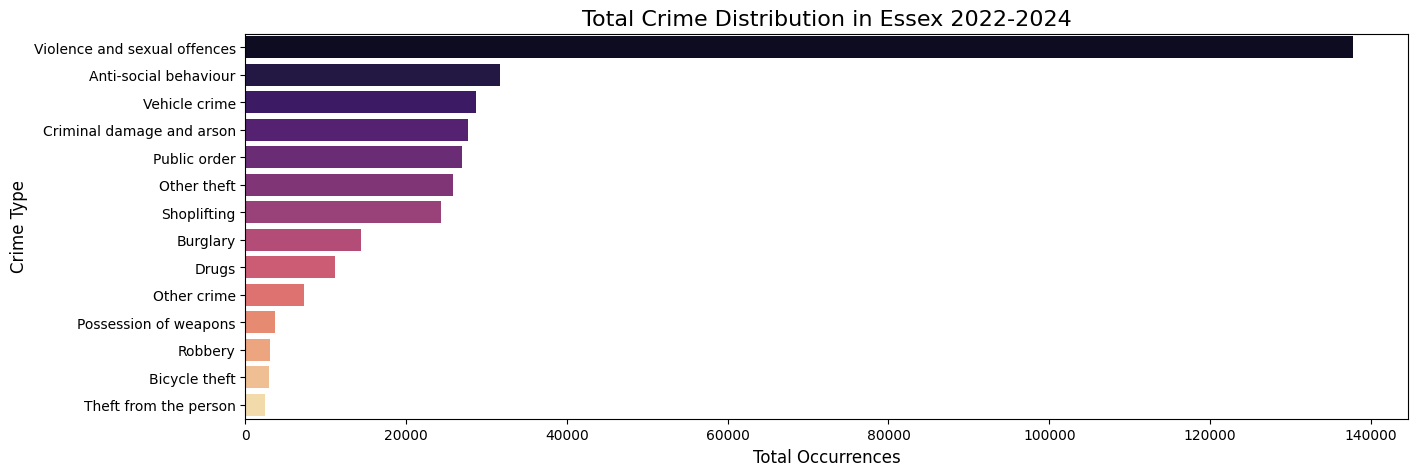

In [104]:
plt.figure(figsize=(15, 5)) 
sns.barplot(x='Crime_total', y='Crime_type', data=crimeEssex_pd, palette='magma')
plt.title('Total Crime Distribution in Essex 2022-2024', fontsize=16)
plt.xlabel('Total Occurrences', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()

In [105]:
crimeEssexYearly = sqlContext.sql('''
    SELECT 
        Crime_type, 
        SUBSTRING(Month, 1, 4) AS Year, 
        COUNT(Crime_type) AS Crime_total
    FROM tbl_essex
    WHERE SUBSTRING(Month, 1, 4) IN ('2022','2023', '2024')  
    GROUP BY Crime_type, SUBSTRING(Month, 1, 4)
    ORDER BY Year, Crime_total DESC
''')

crimeEssexYearly.show(10)

+--------------------+----+-----------+
|          Crime_type|Year|Crime_total|
+--------------------+----+-----------+
|Violence and sexu...|2022|      17639|
|Anti-social behav...|2022|       4384|
|        Public order|2022|       3694|
|       Vehicle crime|2022|       3607|
|Criminal damage a...|2022|       3375|
|         Other theft|2022|       3321|
|         Shoplifting|2022|       2271|
|            Burglary|2022|       1635|
|               Drugs|2022|       1364|
|         Other crime|2022|        801|
+--------------------+----+-----------+
only showing top 10 rows



In [106]:
crimeEssexYearly_pd = crimeEssexYearly.toPandas()
crimeEssexYearly_pd

,Crime_type,Year,Crime_total
0,Violence and sexual offences,2022,17639
1,Anti-social behaviour,2022,4384
2,Public order,2022,3694
3,Vehicle crime,2022,3607
4,Criminal damage and arson,2022,3375
5,Other theft,2022,3321
6,Shoplifting,2022,2271
7,Burglary,2022,1635
8,Drugs,2022,1364
9,Other crime,2022,801


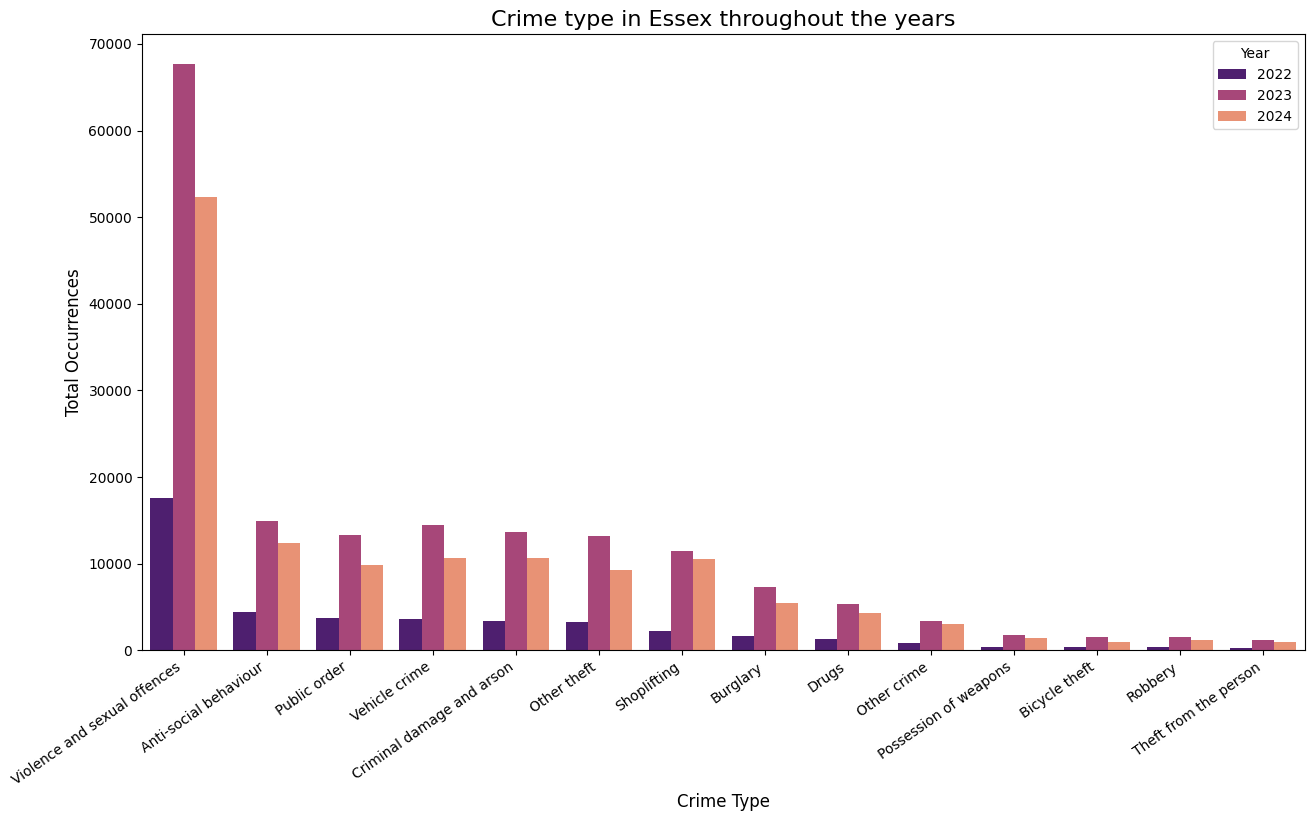

In [107]:
plt.figure(figsize=(15, 8))
sns.barplot(data=crimeEssexYearly_pd, x='Crime_type', y='Crime_total', hue='Year', palette='magma')
plt.title('Crime type in Essex throughout the years', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Occurrences', fontsize=12)
plt.xticks(rotation=35, ha='right')  
plt.legend(title='Year', fontsize=10)
plt.show()